In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import re

In [2]:
df=pd.read_csv('/home/diplopia/excel analyze/data/노블컴퍼니7_내역_2024092910.csv')
df=df.fillna(value=str(0))
df['후원시간'] = pd.to_datetime(df['후원시간'])
df['hour'] = df['후원시간'].dt.hour
df['hour'] = [str(i) for i in df['hour']]
df['day'] = df['후원시간'].dt.day
re_df = df[(df['참여BJ'] != '노블컴퍼니(대표BJ)') & (df['참여BJ'] != '콩승아') & (df['참여BJ'] != '0') & (df['후원하트']>=100)]


In [3]:
vip_list=[]
for i in re_df['후원 아이디(닉네임)']:
    vip_list.append(i.split('(')[1][:-1])

re_df['후원 아이디(닉네임)']=vip_list

/tmp/ipykernel_71337/8002336.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_df['후원 아이디(닉네임)']=vip_list


In [4]:
re_df

,후원시간,후원 아이디(닉네임),후원하트,참여BJ,하트점수,기여도,기타,hour,day
0,2024-09-27 03:26:58,지나가버린사람,1211,백설이,1211,1211,0,3,27
1,2024-09-27 03:26:51,지나가버린사람,1211,소야,1211,1211,0,3,27
2,2024-09-27 03:26:35,지나가버린사람,1211,신시아,1211,1211,0,3,27
3,2024-09-27 03:24:02,한가을ღ유깡,1200,새리,1200,1200,0,3,27
4,2024-09-27 03:23:29,솔이⛧ZI존z,1200,솔이,1200,1200,0,3,27
...,...,...,...,...,...,...,...,...,...
473,2024-09-26 15:39:13,☆건빵왕자,999,신시아,999,999,0,15,26
474,2024-09-26 15:28:04,미치도록누군가그리운계절,5555,린린,5555,5555,0,15,26
475,2024-09-26 15:27:48,백호제로46,100,서와와,-100,100,0,15,26
476,2024-09-26 15:26:28,ღ새리웅니와따ღ,1099,새리,1099,1099,0,15,26


## 1. 출연자별 총 하트 합계 그래프

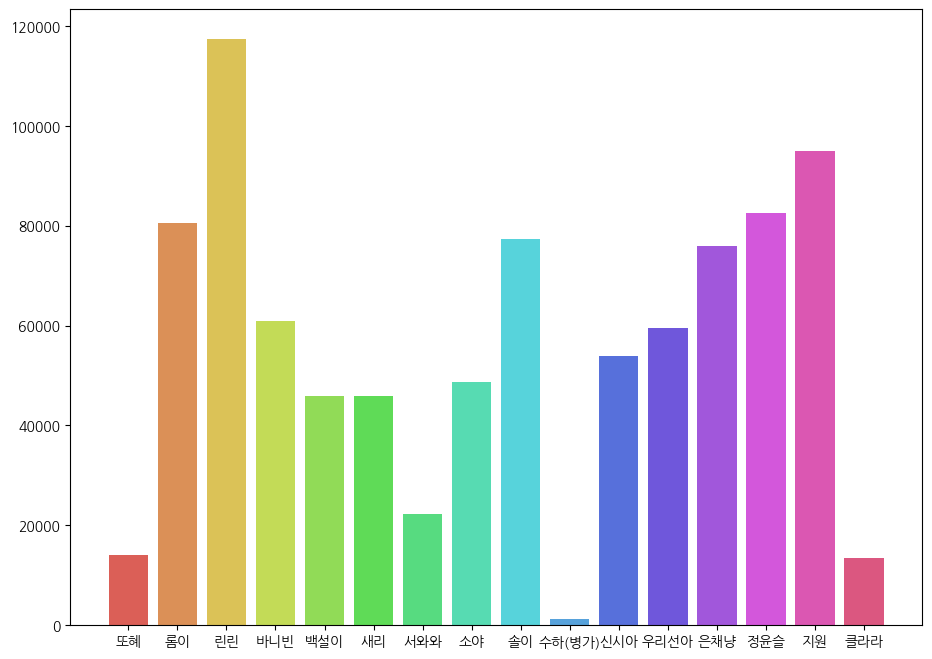

In [5]:
BJ_list = sorted(list(set(re_df['참여BJ'])))

BJ_hearts=[]
for i in BJ_list:
    hearts = re_df[re_df['참여BJ']==i]['후원하트'].sum()
    BJ_hearts.append(hearts)

# plt.rc('font',family='NanumGothic')
colors = sns.color_palette('hls',len(BJ_hearts))
plt.figure(figsize=(11,8))
plt.bar(BJ_list,BJ_hearts,color=colors)
plt.show()

### 1-1. 출연자가 받은 하트 통계

In [6]:
#1회차 BJ 평균
avg = sum(BJ_hearts)/len(BJ_list)
median = np.median(BJ_hearts)
max = np.max(BJ_hearts)
min = np.min(BJ_hearts)
lower25 = np.percentile(BJ_hearts,25,interpolation = 'nearest')
higher25 = np.percentile(BJ_hearts,75, interpolation = 'nearest')
print('평균 : ',round(avg), '\n중위값 : ',median, '\n하위25% : ',lower25, '\n상위25% : ',higher25, '\n최대값 : ',max, '\n최솟값 : ',min)

평균 :  55908 
중위값 :  56720.0 
하위25% :  45906 
상위25% :  77353 
최대값 :  117460 
최솟값 :  1188


## 2. 시청자별 총 하트 하계 그래프

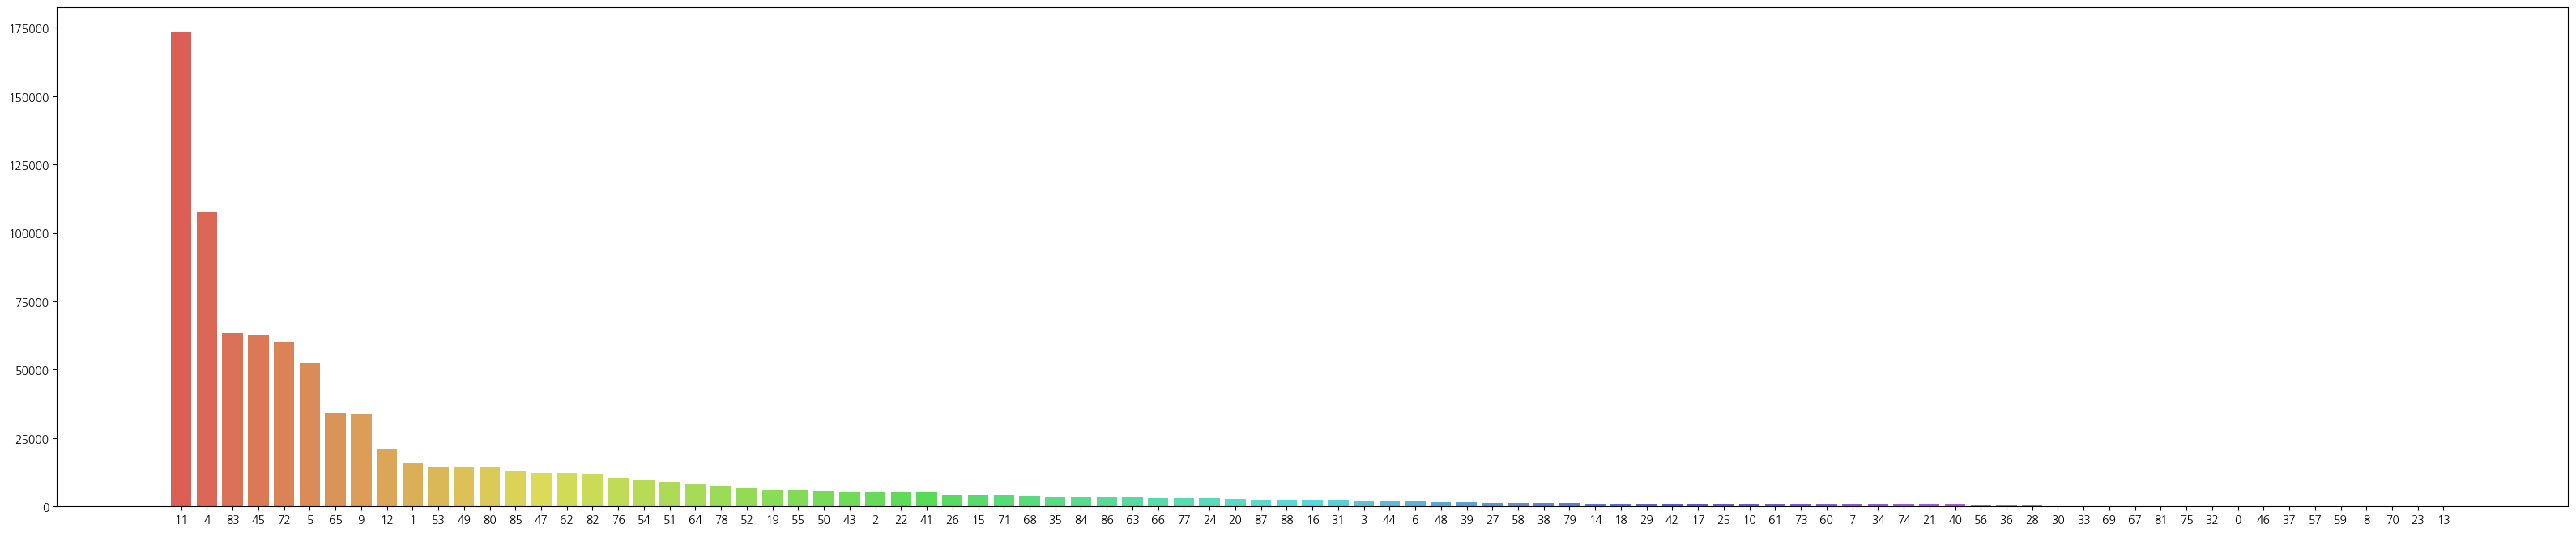

In [7]:
VIP_list = sorted(list(set(re_df['후원 아이디(닉네임)'])))

VIP_hearts=[]
for i in VIP_list:
    hearts = re_df[re_df['후원 아이디(닉네임)']==i]['후원하트'].sum()
    VIP_hearts.append(hearts)

new_df = pd.DataFrame({'ID':[str(i) for i in range(len(VIP_list))],
                        'vip_name':VIP_list,
                       'hearts':VIP_hearts})

sort_df = new_df.sort_values('hearts',ascending=False)
# for i,j in zip(VIP_list,VIP_hearts):
#     print(i,j)
# list(sort_df.index)
colors = sns.color_palette('hls',len(VIP_hearts))
plt.figure(figsize=(40,8))
plt.bar(sort_df['ID'],sort_df['hearts'],color=colors)
plt.show()
# sns.barplot(data=sort_df,x='ID',y='hearts',order=sort_df.sort_values('hearts'))

### 2-1. 시청자가 후원한 하트 통계

In [8]:
#1회차 시청자 평균
avg = sum(VIP_hearts)/len(VIP_list)
median = np.median(VIP_hearts)
max = np.max(VIP_hearts)
min = np.min(VIP_hearts)
lower25 = np.percentile(VIP_hearts,25,interpolation = 'nearest')
higher25 = np.percentile(VIP_hearts,75, interpolation = 'nearest')
print('평균 : ',round(avg), '\n중위값 : ',median, '\n하위25% : ',lower25, '\n상위25% : ',higher25, '\n최대값 : ',max, '\n최솟값 : ',min)

평균 :  10051 
중위값 :  2343.0 
하위25% :  1009 
상위25% :  6580 
최대값 :  173781 
최솟값 :  100


### 2-2. 후원을 많이한 시청자 Rank17

In [9]:
sort_df[:17]

,ID,vip_name,hearts
11,11,ZO지GO,173781
4,4,0원,107590
83,83,태자_갓_지림,63401
45,45,바니빈ෆ눈먼천사,62995
72,72,재벌박회장,60201
5,5,1081주년갓보아❤️73,52541
65,65,은채궁에하트터는김루팡,34100
9,9,QP➷백설이❤️MAWOO,33851
12,12,[AV]쪼아오빠달려붕붕,21147
1,1,*⛧★⭐소다_동탄➷,16003


In [10]:
time_df = re_df.groupby(['day','hour'])['후원하트'].sum().reset_index()
# time_df['hour']=[str(i) for i in time_df['hour']]


In [11]:
time_df

,day,hour,후원하트
0,26,15,16274
1,26,16,100469
2,26,17,49863
3,26,18,26204
4,26,19,61477
5,26,20,65180
6,26,21,66200
7,26,22,55196
8,26,23,136918
9,27,0,78117


## 3. 시간별 총 하트 합계 그래프

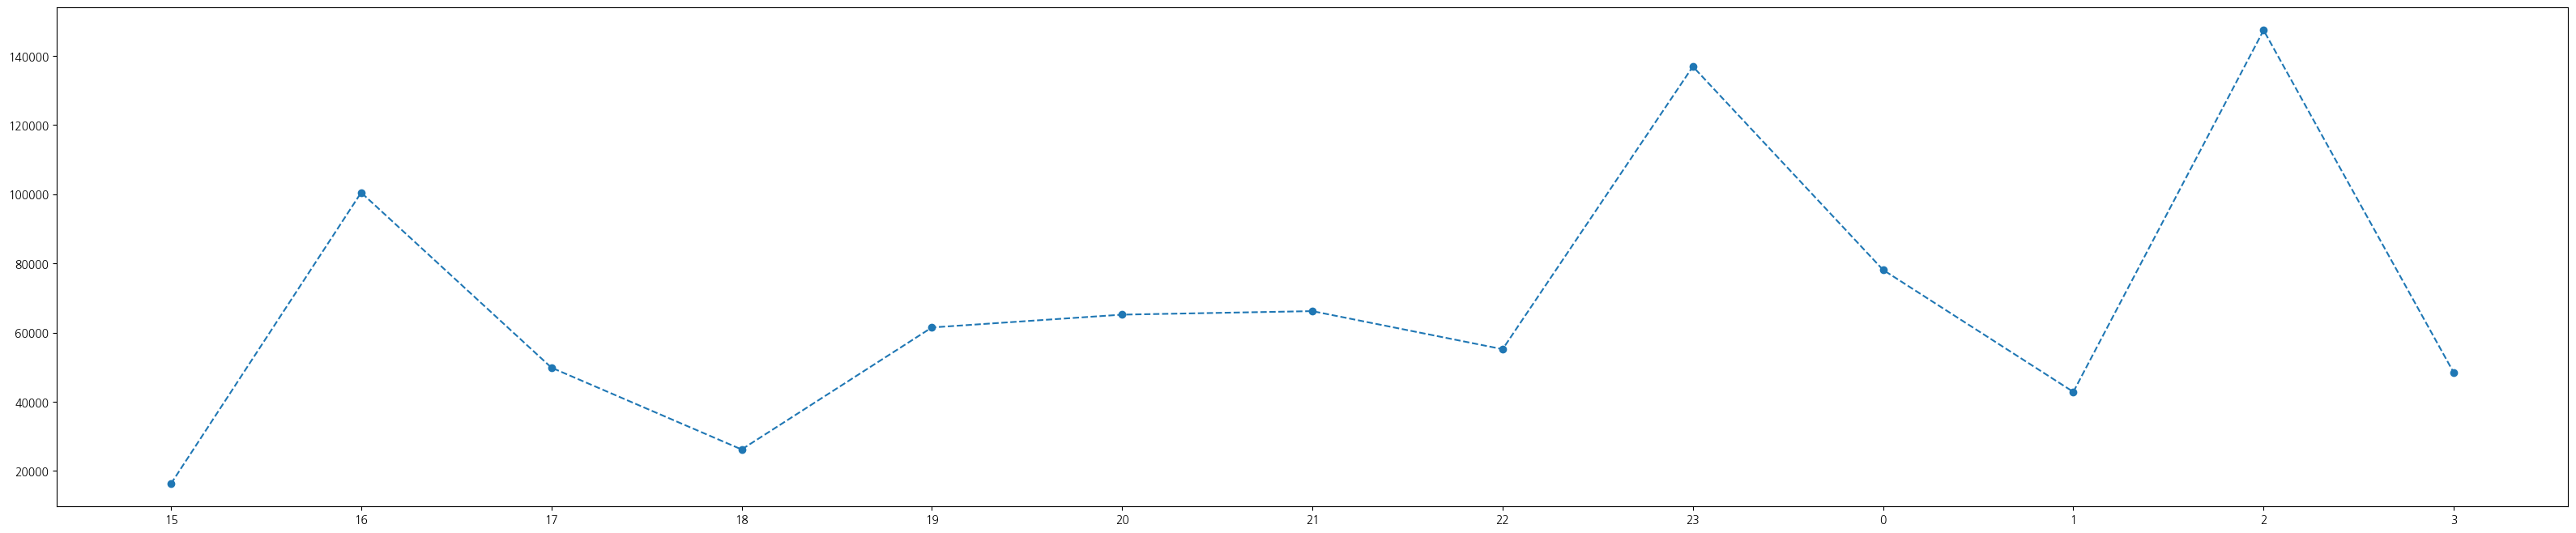

In [12]:
plt.figure(figsize=(40,8))
plt.plot(time_df['hour'],time_df['후원하트'],linestyle='--',marker='o')
plt.show()

## 4. 출연자별 하트 시계열 그래프

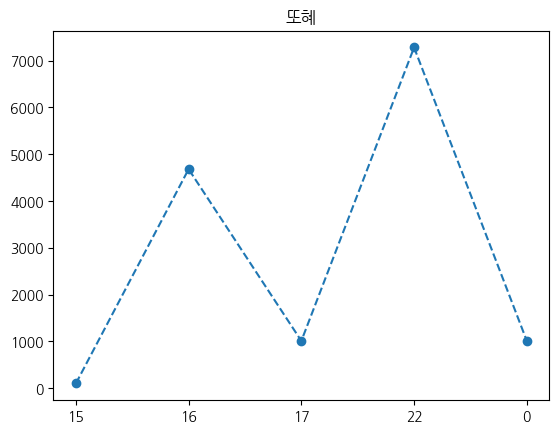

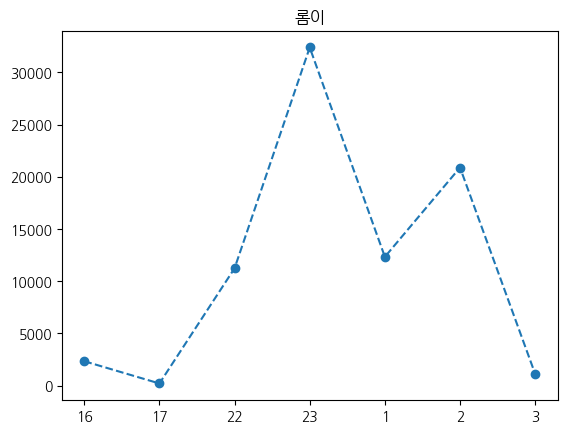

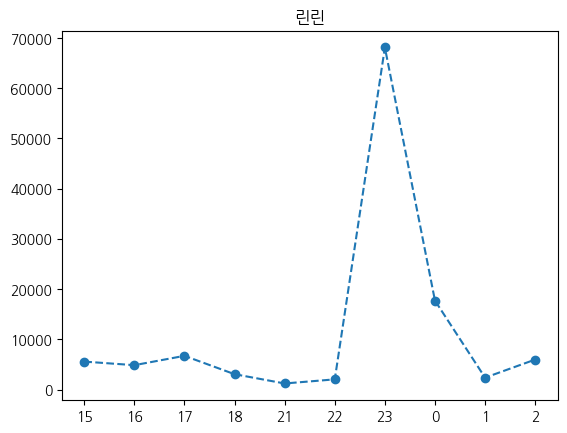

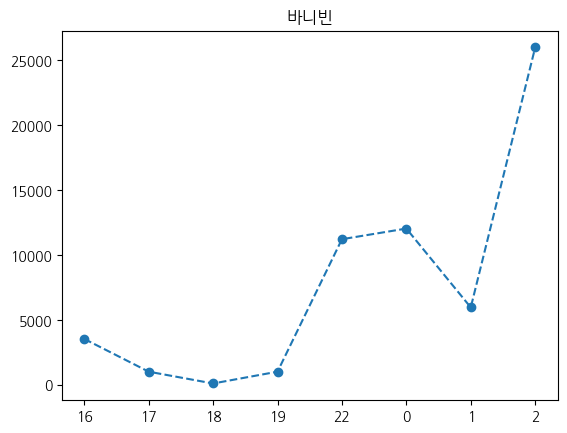

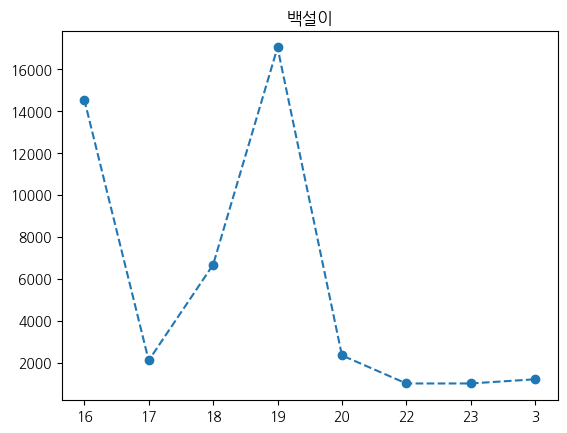

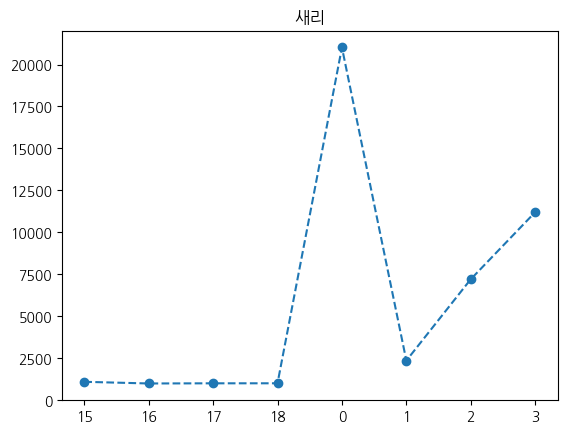

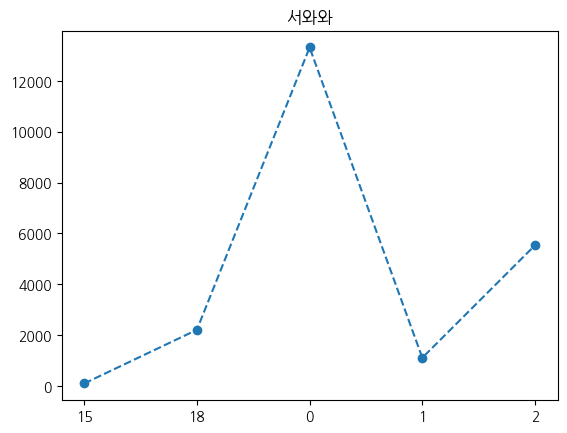

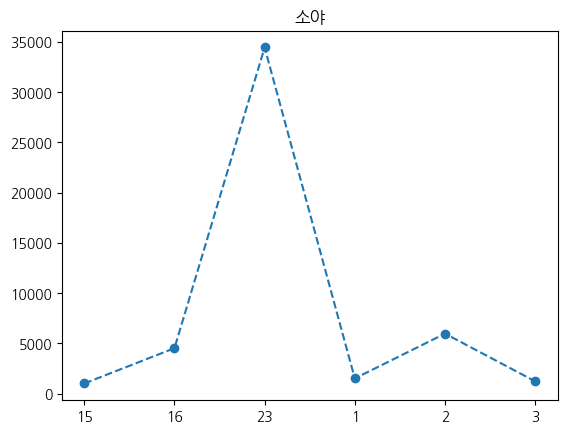

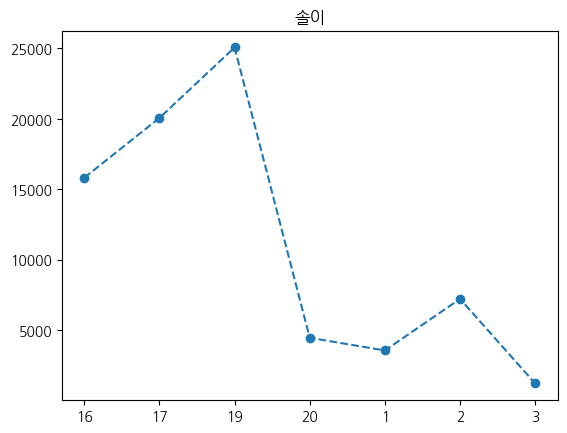

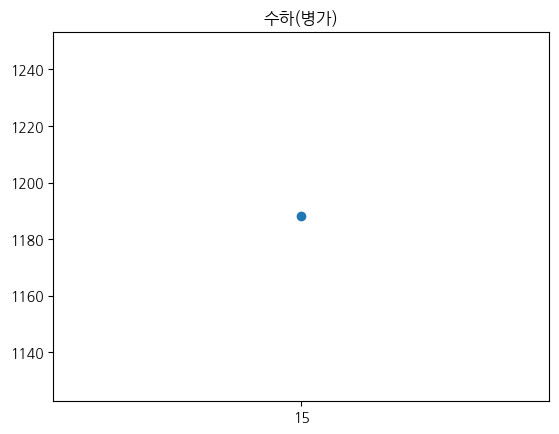

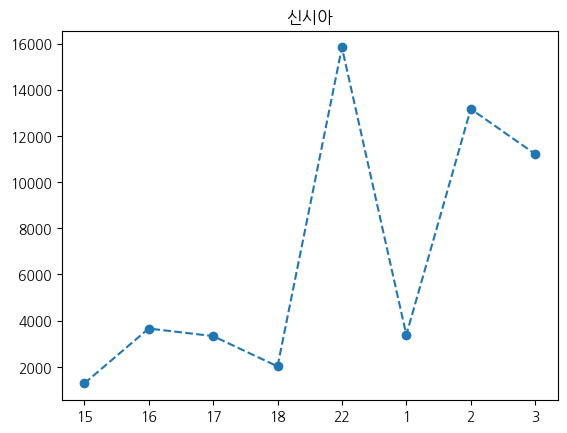

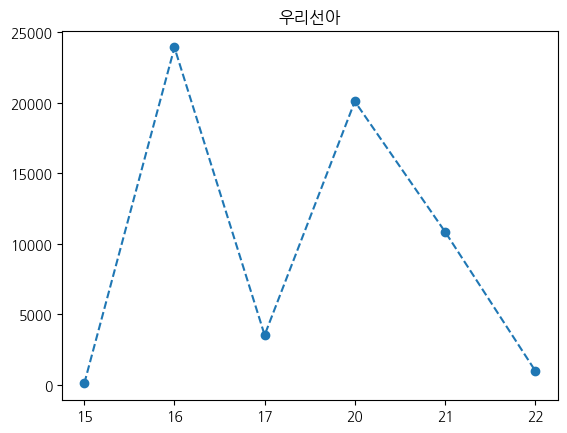

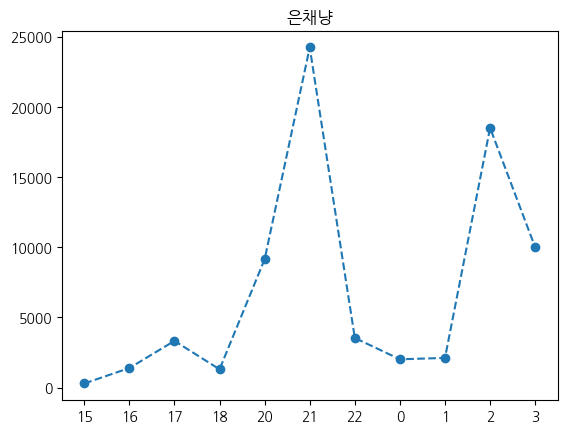

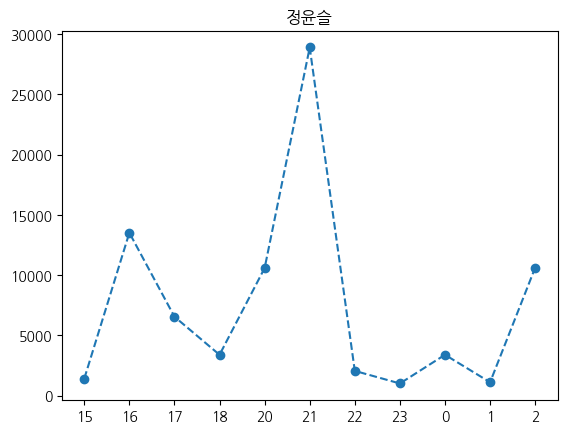

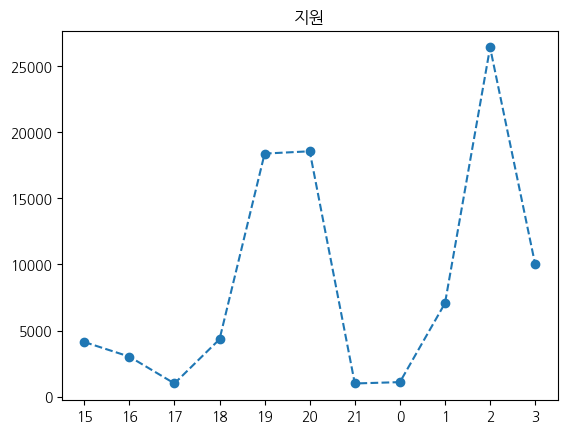

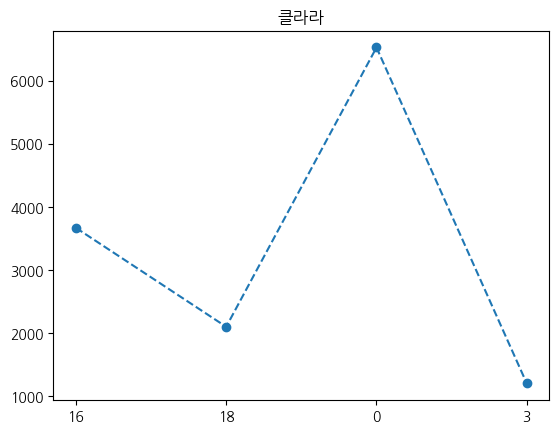

In [13]:
for i in BJ_list:
    BJ_time_df = re_df[re_df['참여BJ']==i].groupby(['day','hour'])['후원하트'].sum().reset_index()
    plt.plot(BJ_time_df['hour'],BJ_time_df['후원하트'],linestyle='--',marker='o')
    plt.title(i)
    plt.show()

## 5. 시청자별 하트후원 시계열 그래프

*⛧★⭐동탄_소다➷


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9959 (\N{INVERTED PENTAGRAM}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10167 (\N{HEAVY BLACK-FEATHERED SOUTH EAST ARROW}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


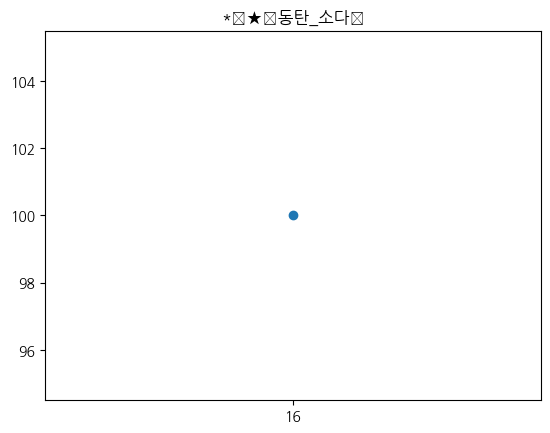

*⛧★⭐소다_동탄➷


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9959 (\N{INVERTED PENTAGRAM}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10167 (\N{HEAVY BLACK-FEATHERED SOUTH EAST ARROW}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


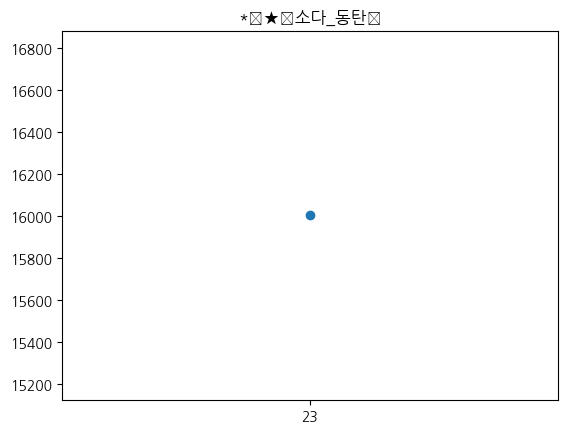

*⛧★소다⭐동탄큰손➷


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9959 (\N{INVERTED PENTAGRAM}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10167 (\N{HEAVY BLACK-FEATHERED SOUTH EAST ARROW}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


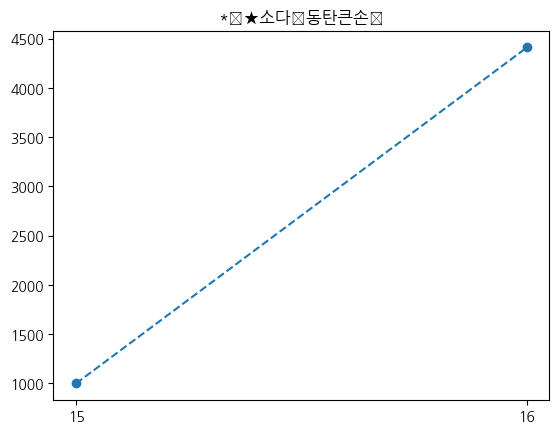

*지원군*


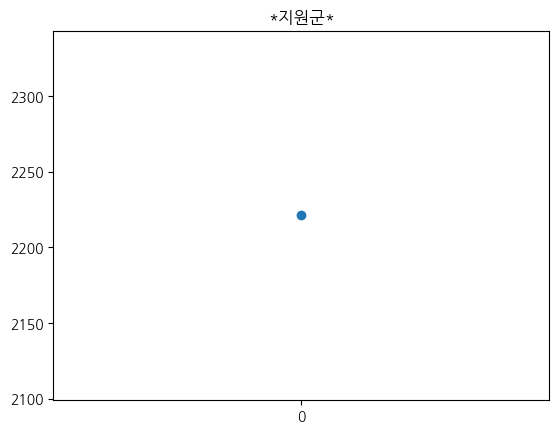

0원


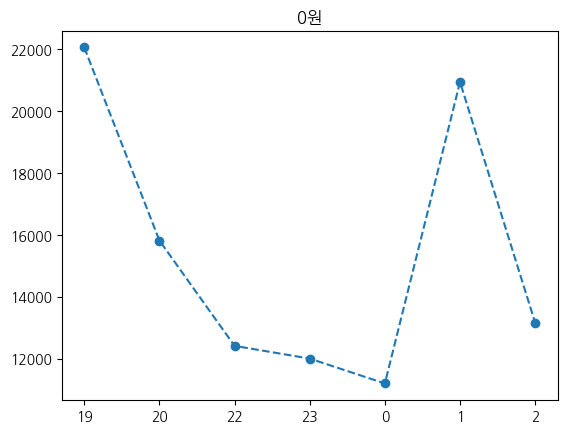

1081주년갓보아❤️73


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


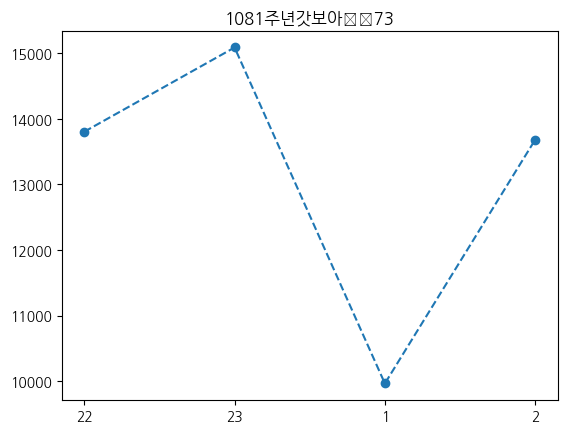

930요미100일⭐찡기


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


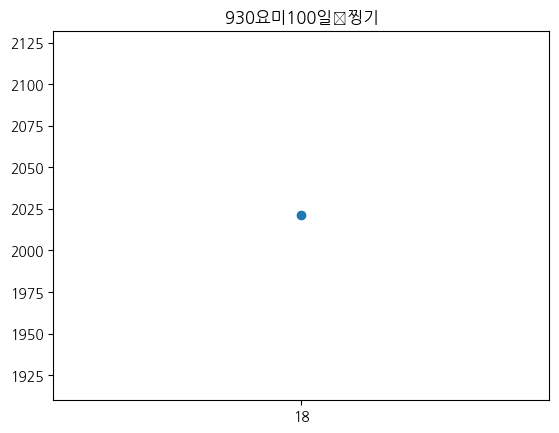

HONEYTTTT


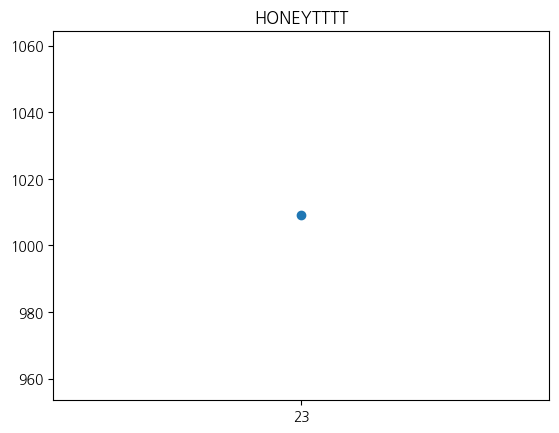

LouisXIII➷


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10167 (\N{HEAVY BLACK-FEATHERED SOUTH EAST ARROW}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


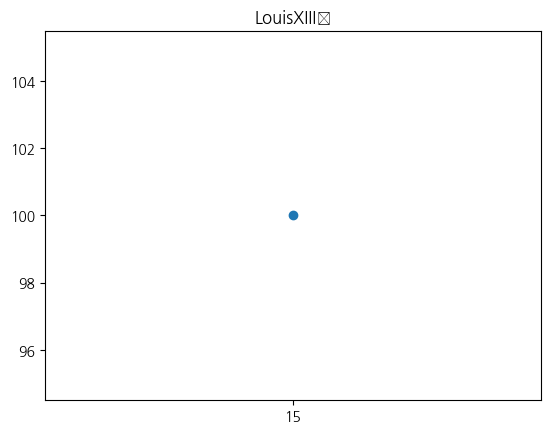

QP➷백설이❤️MAWOO


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10167 (\N{HEAVY BLACK-FEATHERED SOUTH EAST ARROW}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


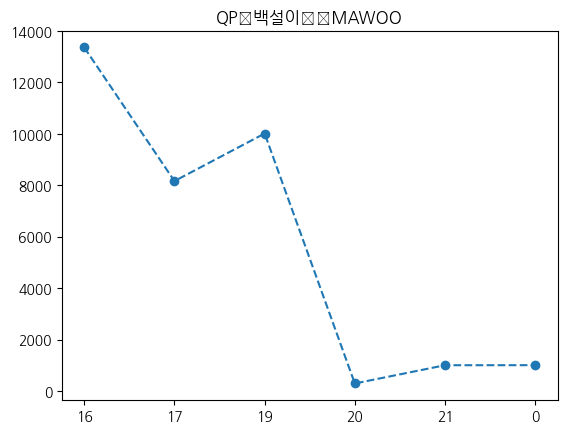

Z1nu


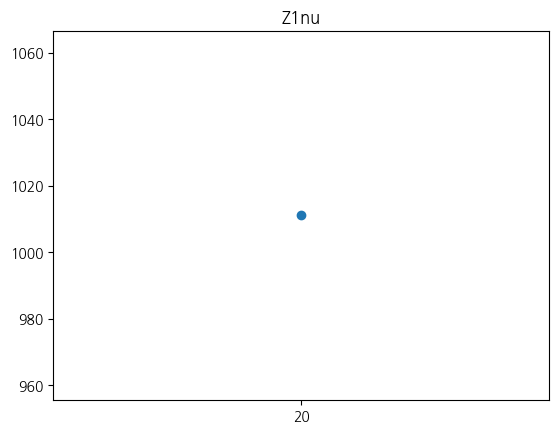

ZO지GO


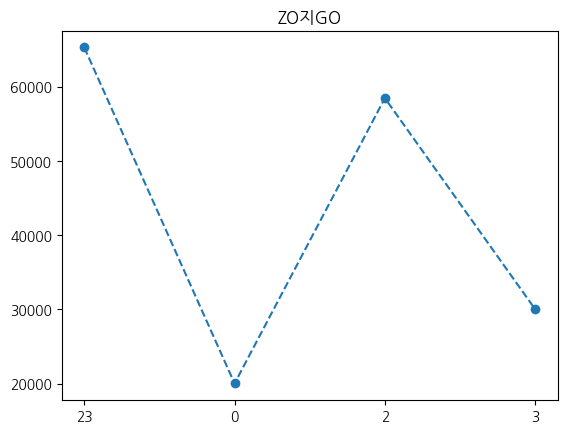

[AV]쪼아오빠달려붕붕


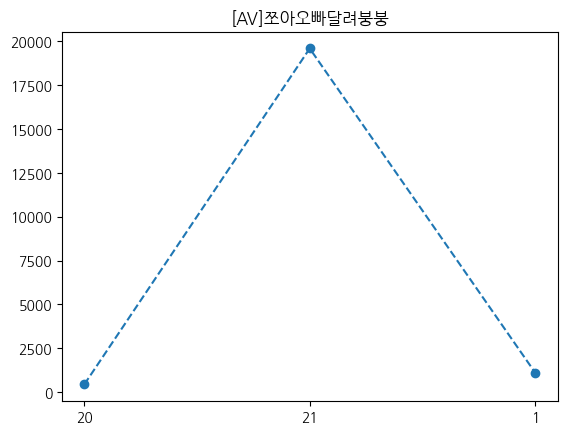

ღღ집사깐따삐야


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


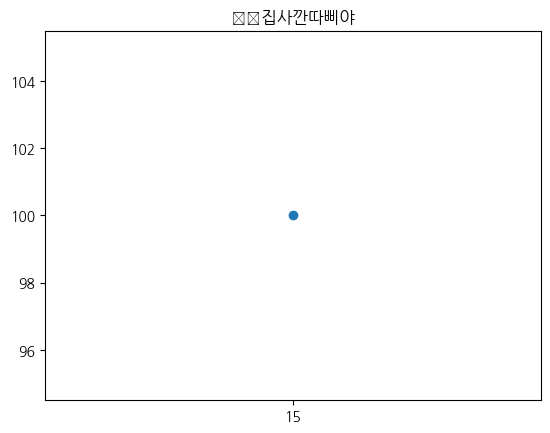

ღ롬이ღ보아ღ예쁘다


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


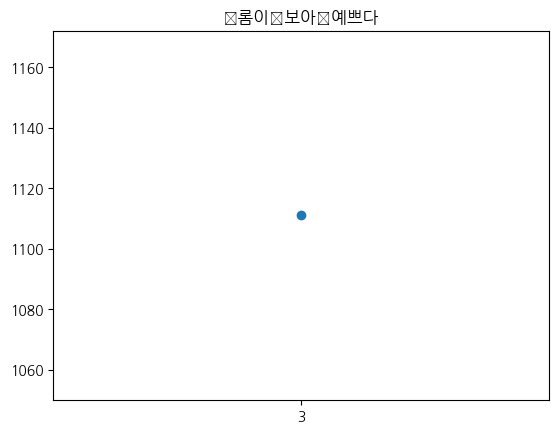

ღ롬이ღ예쁘다


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


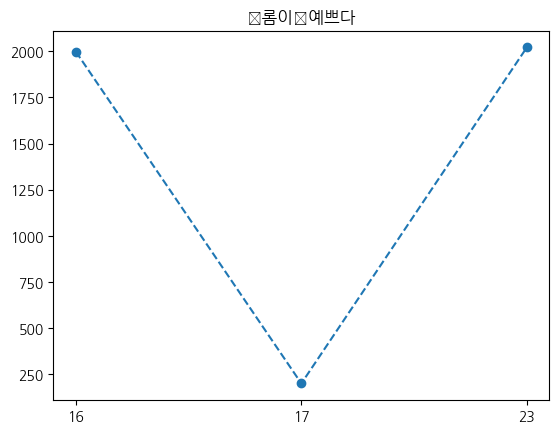

ღ린린ღ⭐클링크⭐


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


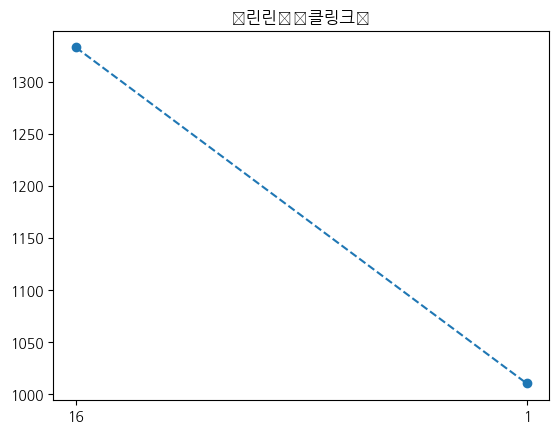

ღ버슬꺼버슬까ღ


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


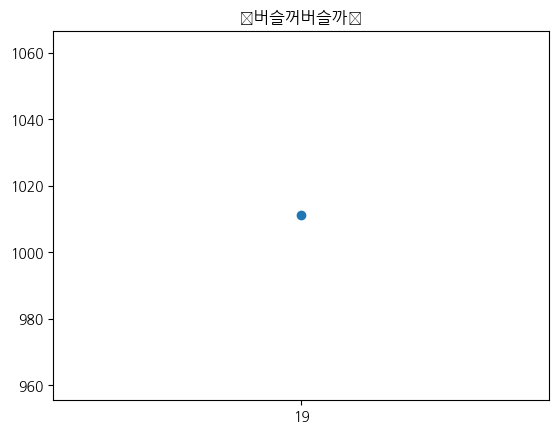

ღ새리웅니와따ღ


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


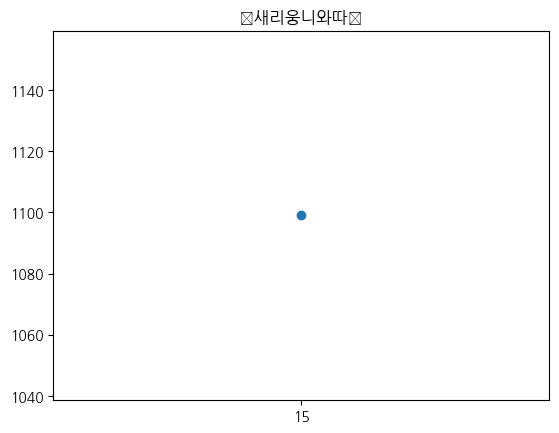

ღ설이랑~❥레이ღ


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


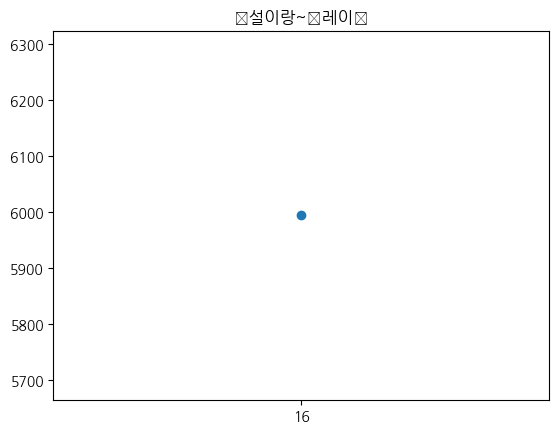

ღ헤으응ღ


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


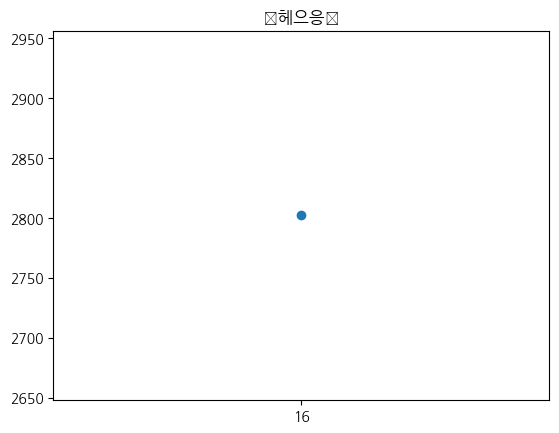

☆건빵왕자


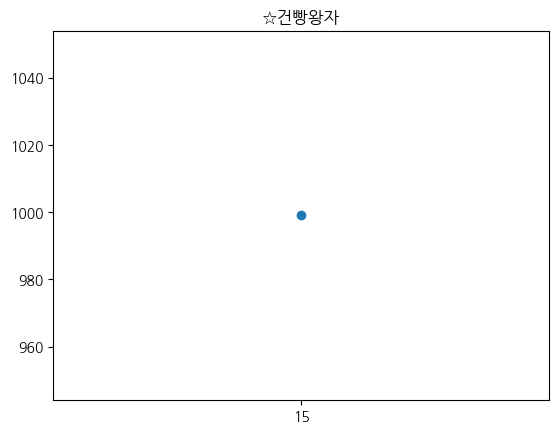

☆블루☆


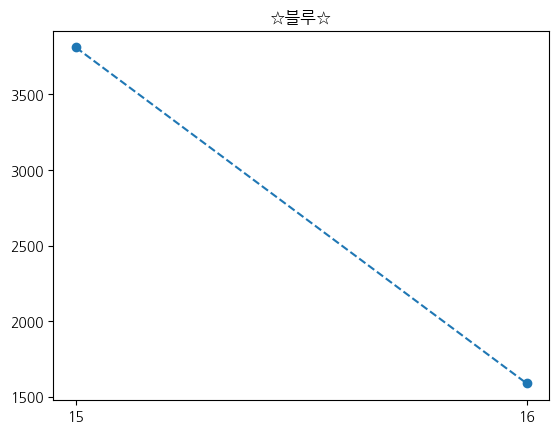

✨뀨우✨


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


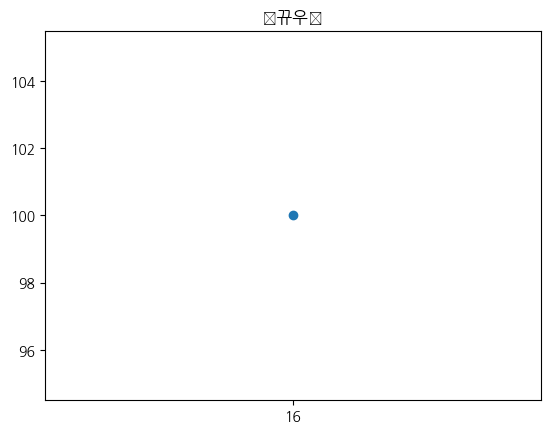

✨노블지원이~뇌졸증~✨


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


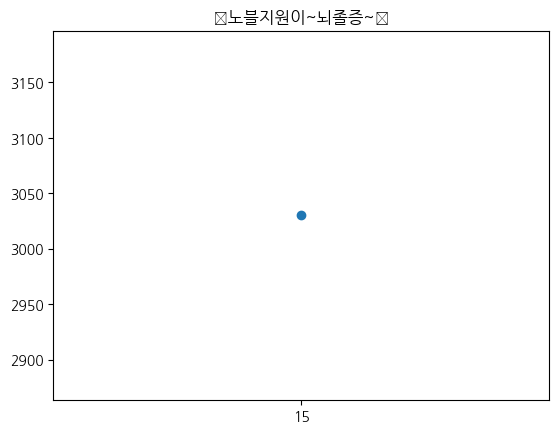

✨흑화한❥Milk✨


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


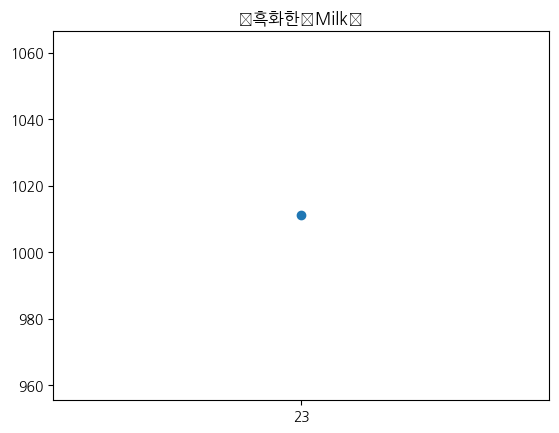

✿새나☾영남에너지⚡


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10047 (\N{BLACK FLORETTE}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9790 (\N{LAST QUARTER MOON}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


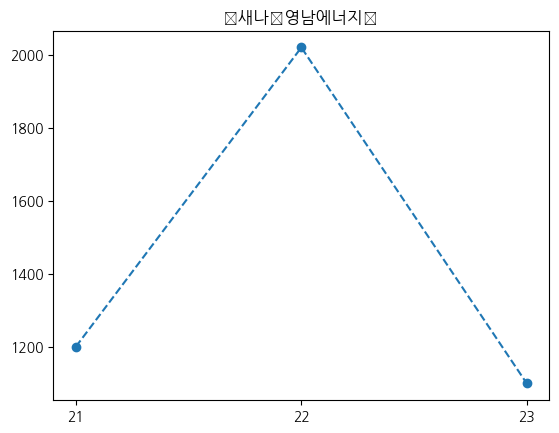

✿소울


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10047 (\N{BLACK FLORETTE}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


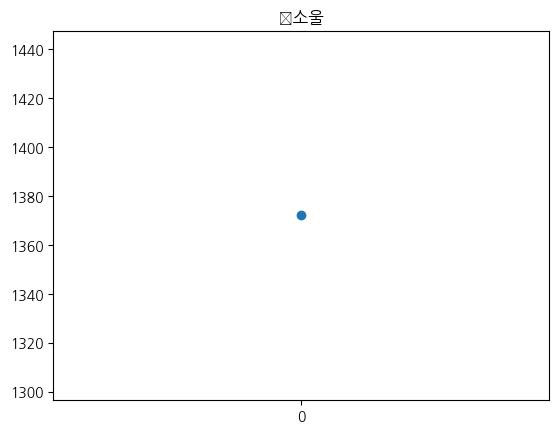

✿신시아✿⁀➷ෆ텍크™


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10047 (\N{BLACK FLORETTE}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8256 (\N{CHARACTER TIE}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10167 (\N{HEAVY BLACK-FEATHERED SOUTH EAST ARROW}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3526 (\N{SINHALA LETTER FAYANNA}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.p

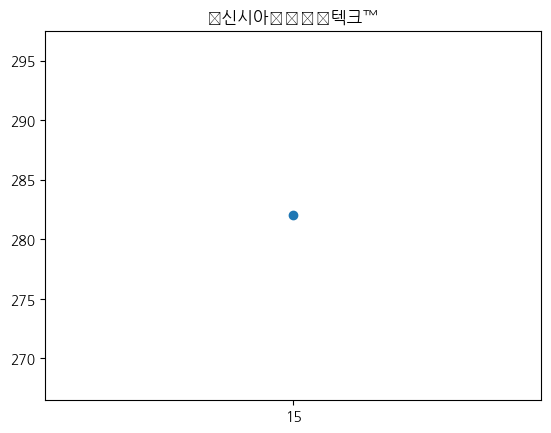

❤️천사제이❤️병구기❤️


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


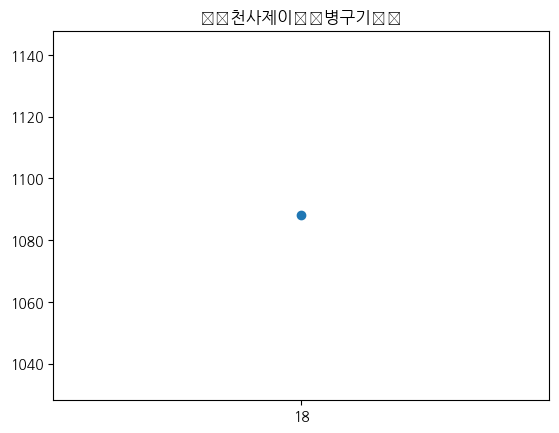

❥1010나연❤️텅장레이


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


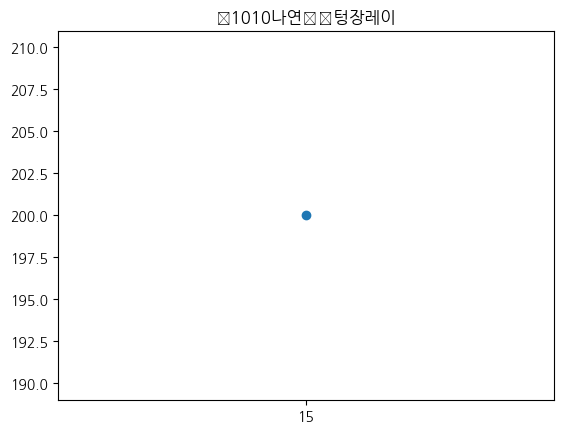

⭐금시월♡헬레빗⭐


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


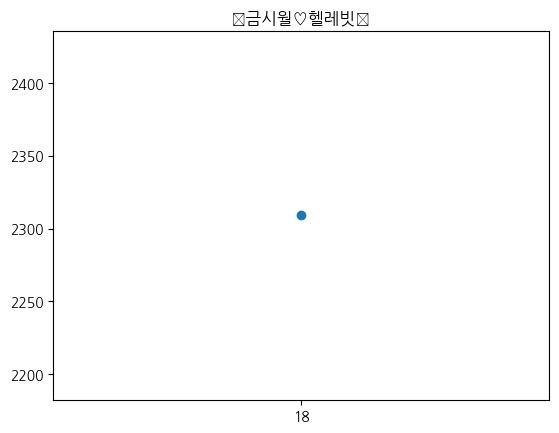

⭐켄이™


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


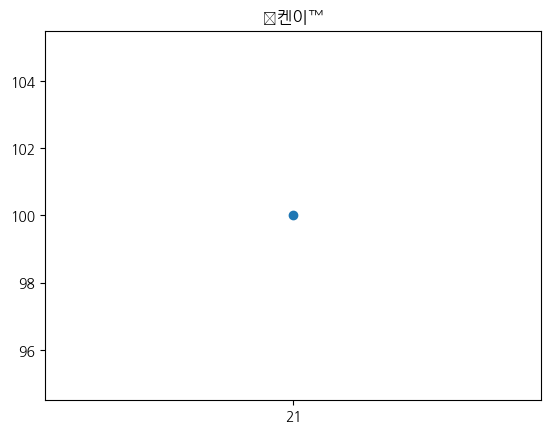

가시고기1


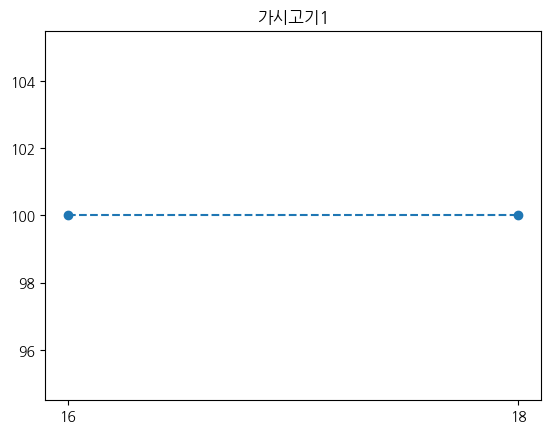

구경꾼오빠


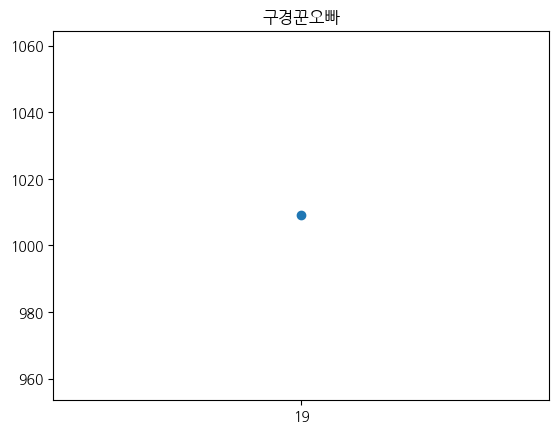

기브앤⭐테이크


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


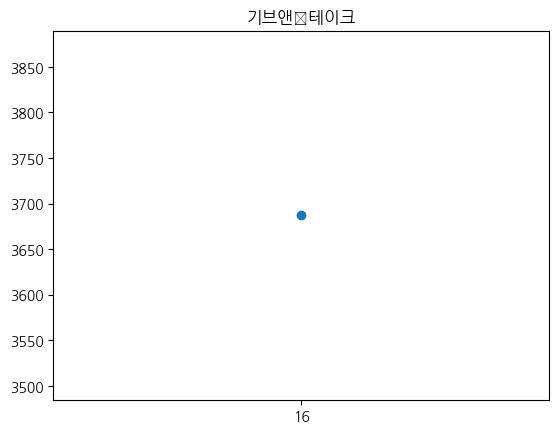

김이서➷⁀❤️집사깐따삐야


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10167 (\N{HEAVY BLACK-FEATHERED SOUTH EAST ARROW}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8256 (\N{CHARACTER TIE}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


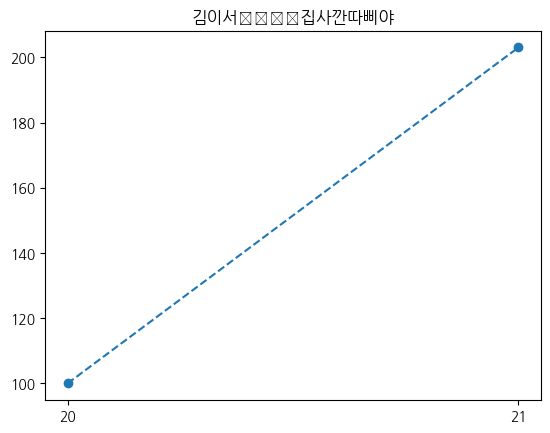

나야나리브


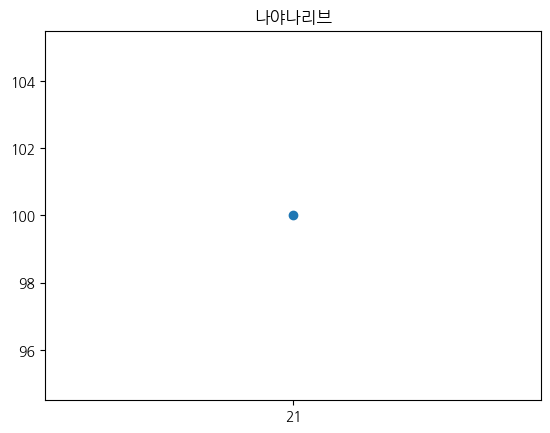

나오PANDA


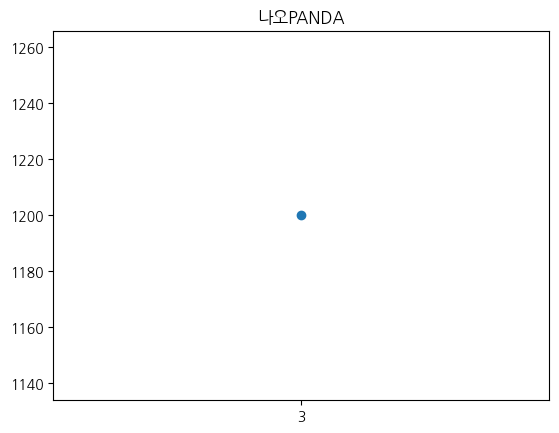

날루리만다


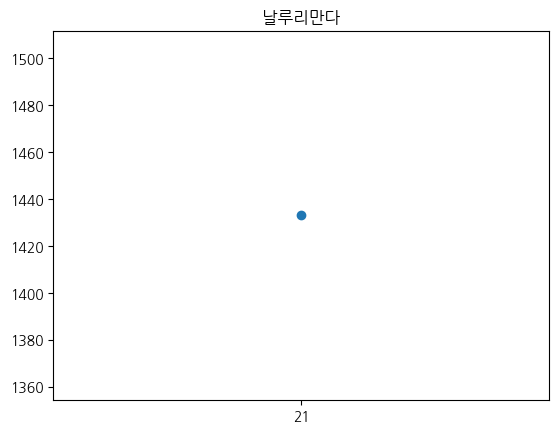

노블⚘지원❥니야


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9880 (\N{FLOWER}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


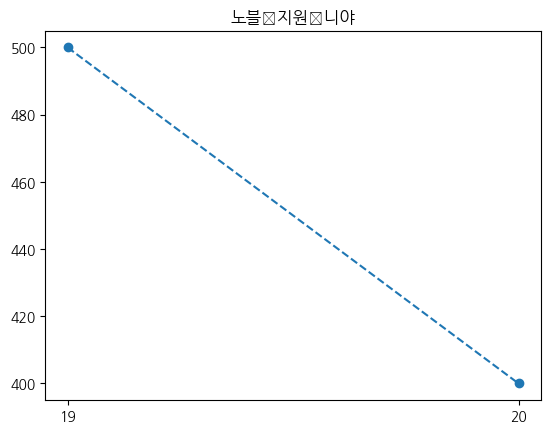

드렁큰베어⚘


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9880 (\N{FLOWER}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


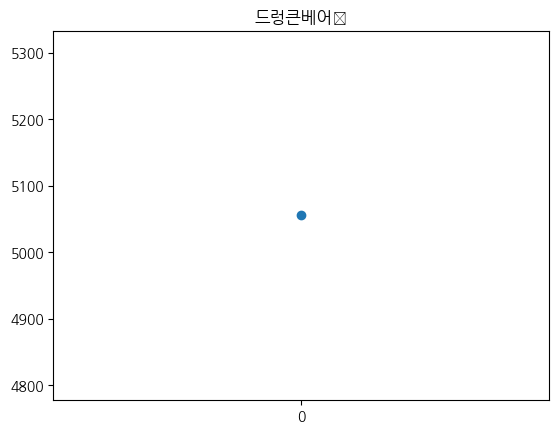

몽키*탱탱✿☾


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10047 (\N{BLACK FLORETTE}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9790 (\N{LAST QUARTER MOON}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


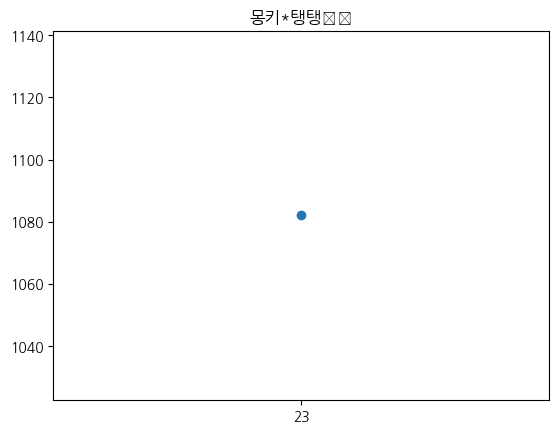

미치도록누군가그리운계절


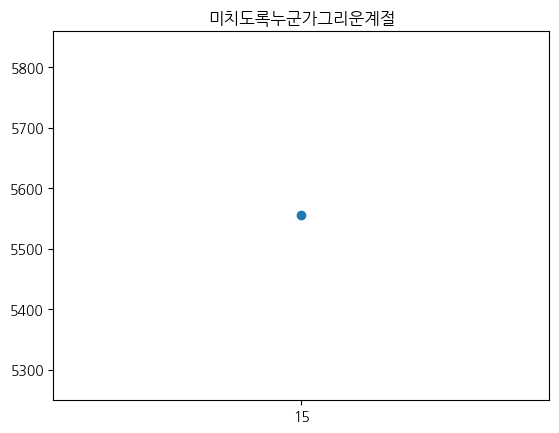

밍밍♪♩


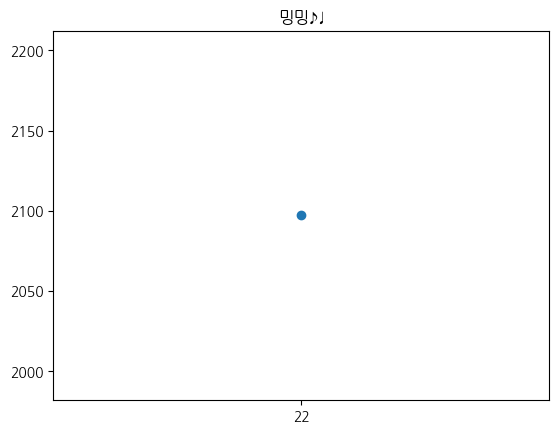

바니빈ෆ눈먼천사


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3526 (\N{SINHALA LETTER FAYANNA}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Matplotlib currently does not support Sinhala natively.
  fig.canvas.print_figure(bytes_io, **kw)


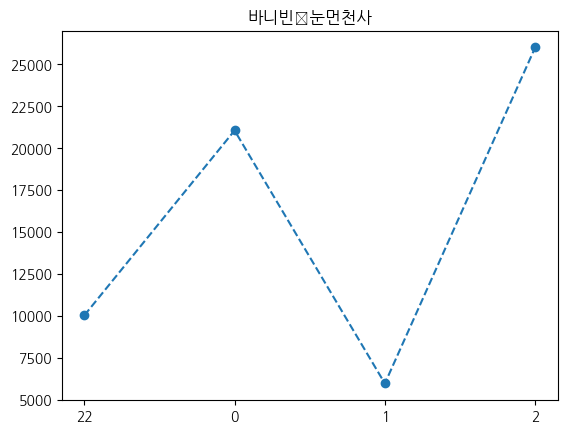

백호제로46


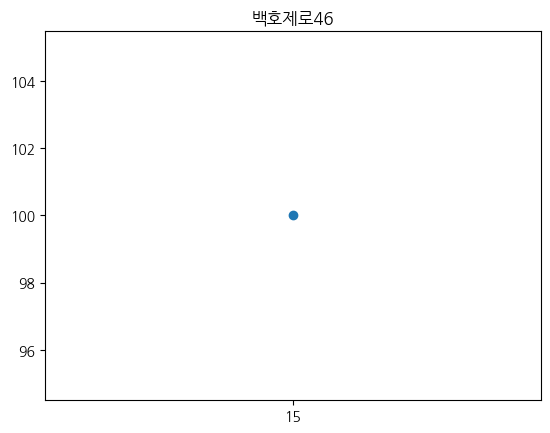

벤츠야


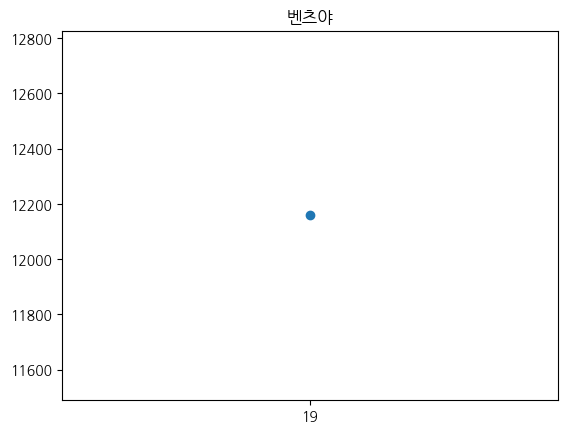

벤틀리23년식♠️신형♠️


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


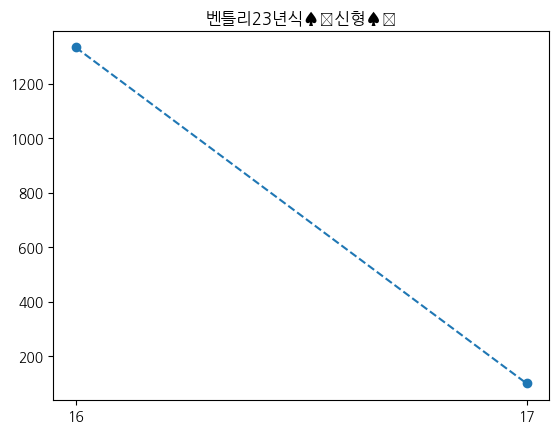

보기드문10새끼


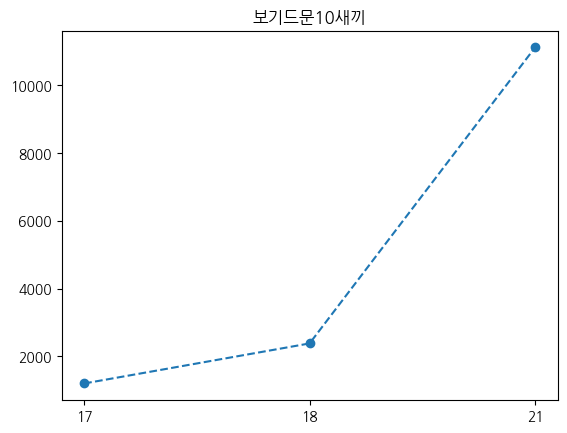

보호자은새❤️금쪽이띠바ෆ


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3526 (\N{SINHALA LETTER FAYANNA}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Matplotlib currently does not support Sinhala natively.
  fig.canvas.print_figure(bytes_io, **kw)


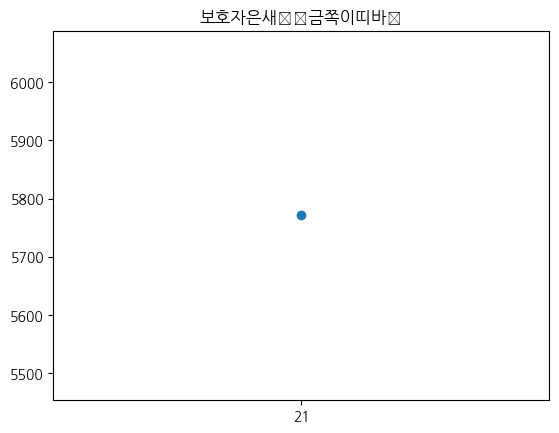

붘칰밬칰


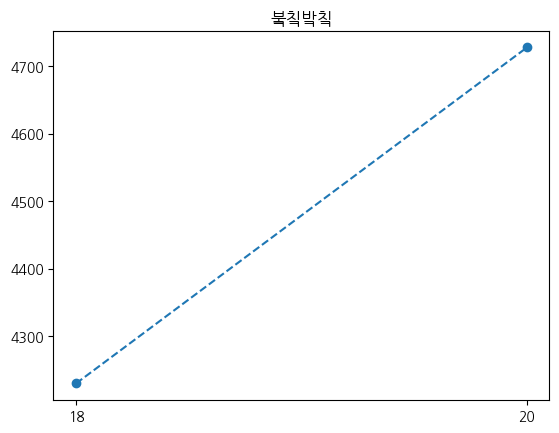

서와와ෆ입쑬


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3526 (\N{SINHALA LETTER FAYANNA}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Matplotlib currently does not support Sinhala natively.
  fig.canvas.print_figure(bytes_io, **kw)


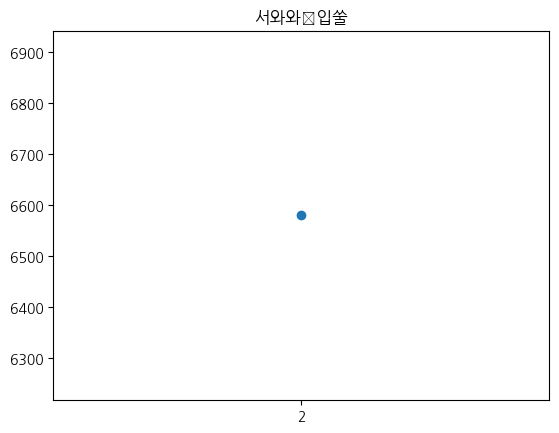

소민♡학이오빠♡


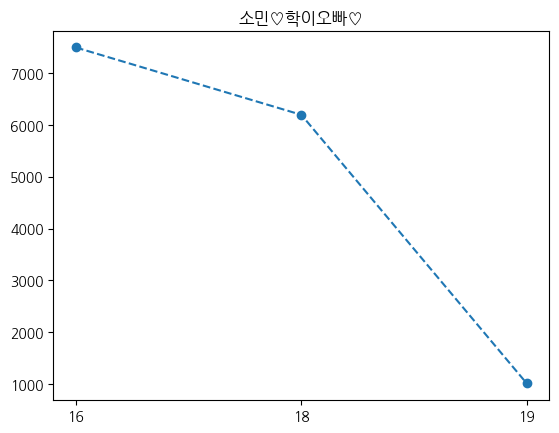

소야♡파이


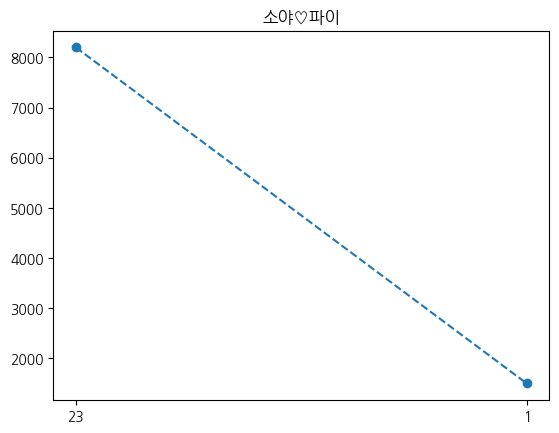

소야♡푸시


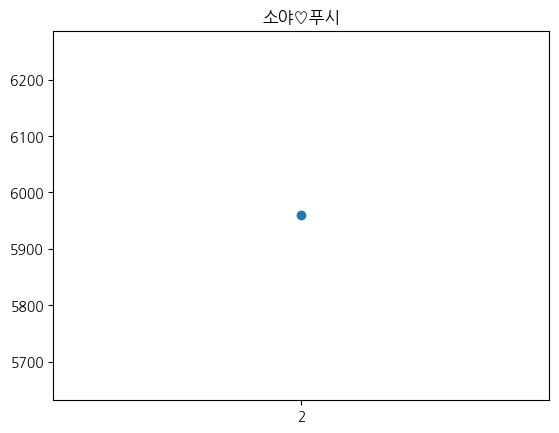

소은✨형동생아우


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


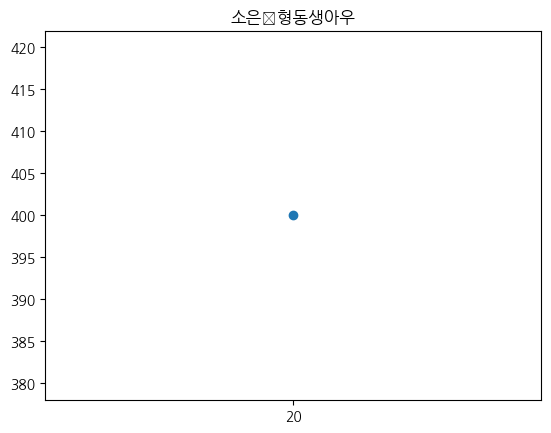

소은❤️나연❤️니꺼


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


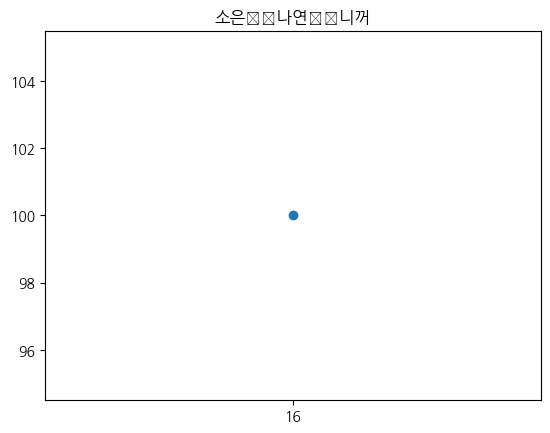

솔이⛧ZI존z


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9959 (\N{INVERTED PENTAGRAM}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


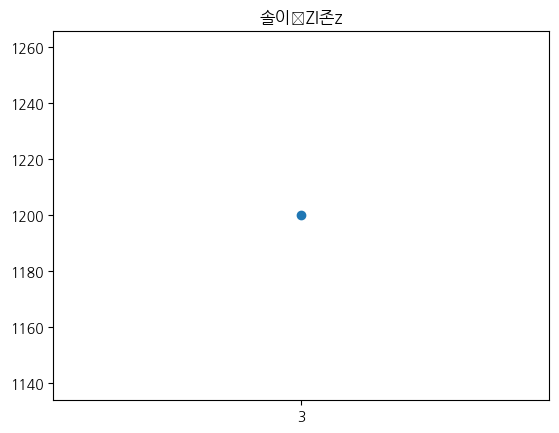

솔이를듁여라~


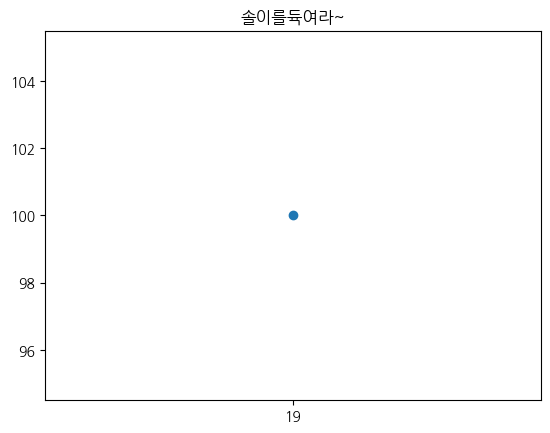

슈화♡


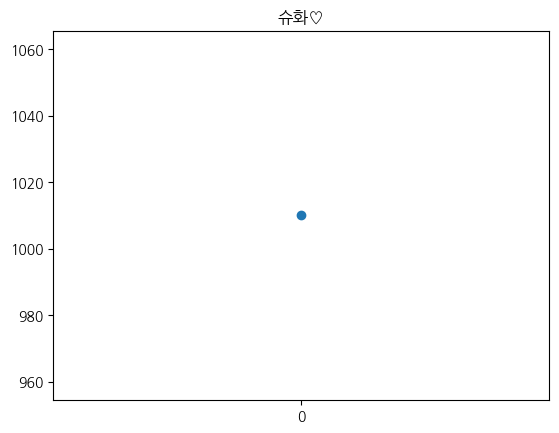

시하♥


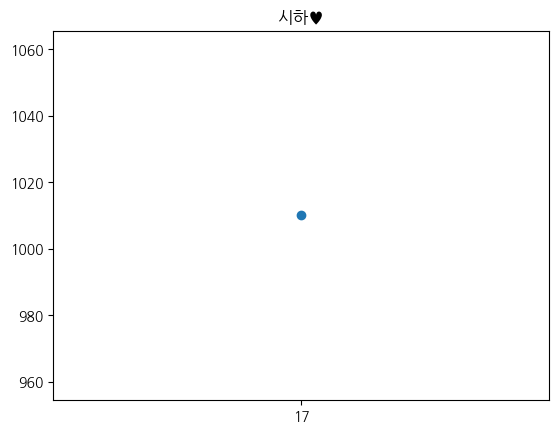

열심히할께요


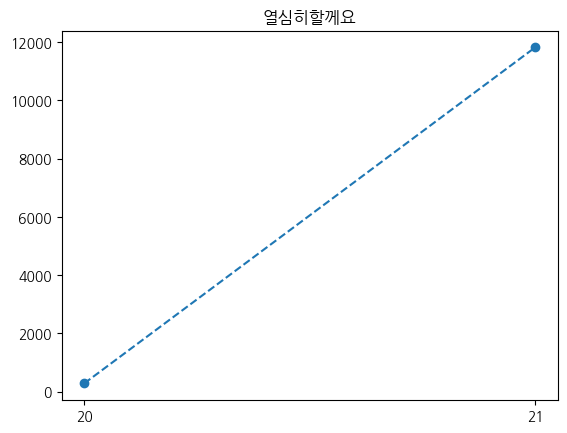

윤서아♡구리


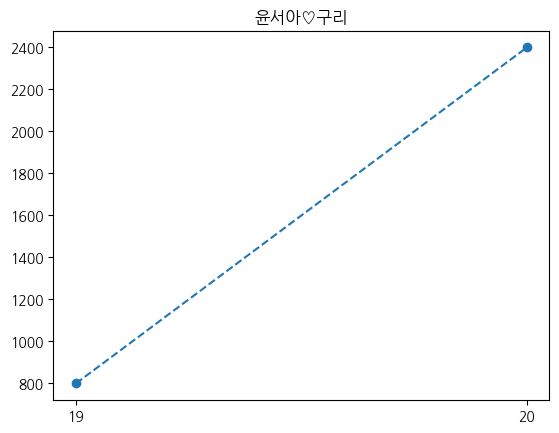

율이쟈기ღ✨리운✨


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


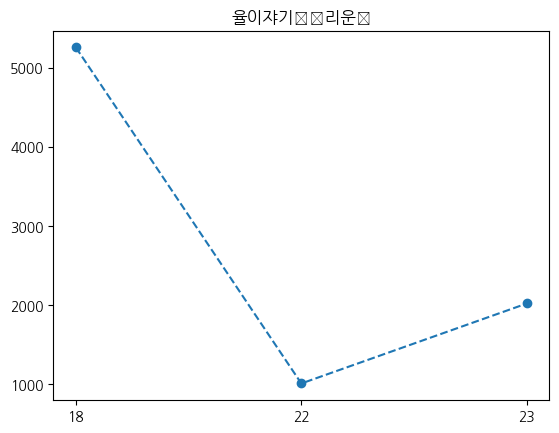

은채궁에하트터는김루팡


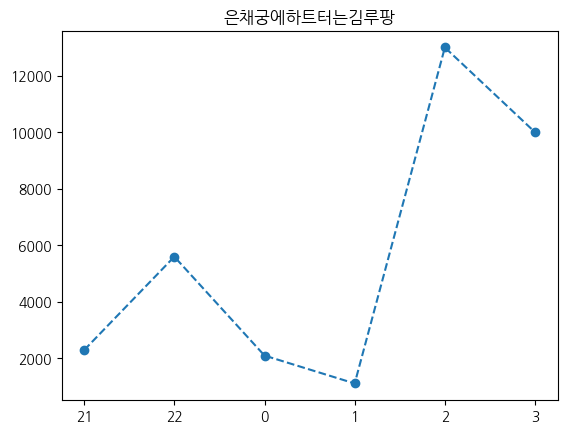

은채낭


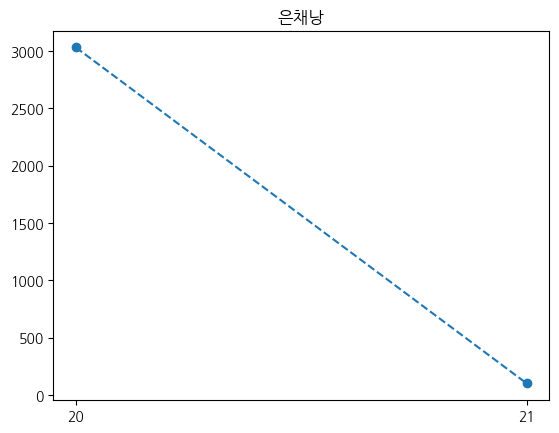

은채냥Ai


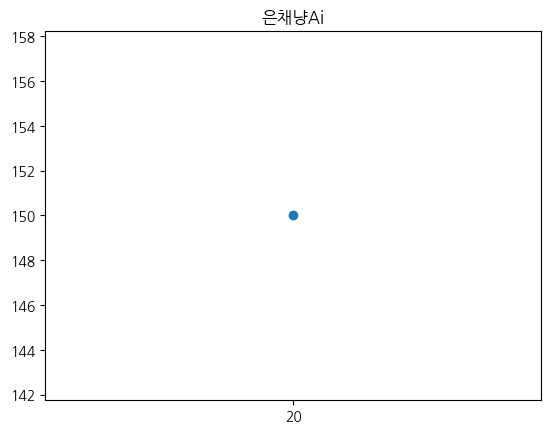

은채입술다라


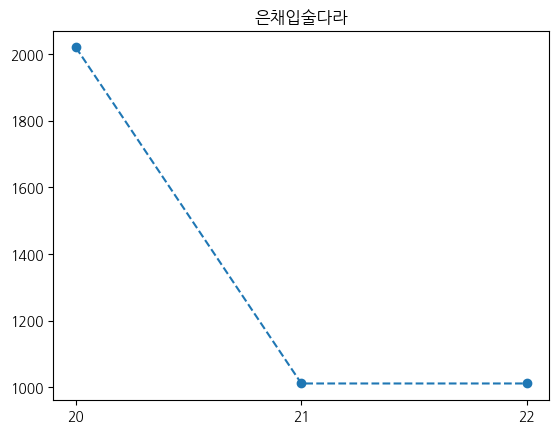

은퇴냥


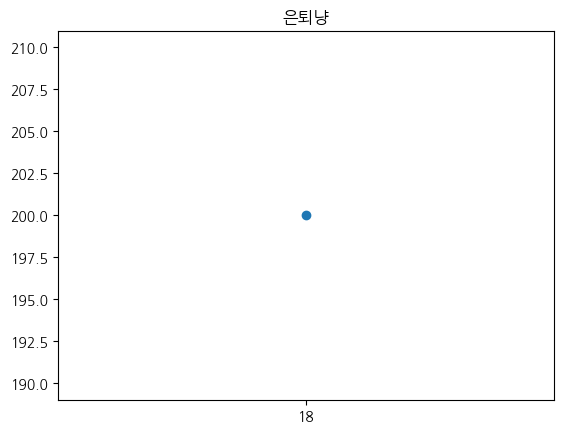

이디회장님의❤️간zi둥이


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


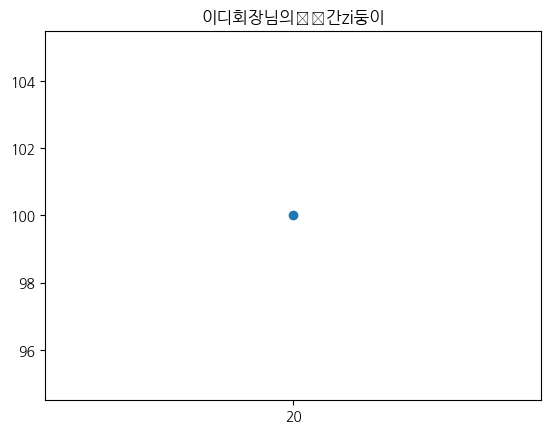

이쁜이정윤슬❤️영원한사랑


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


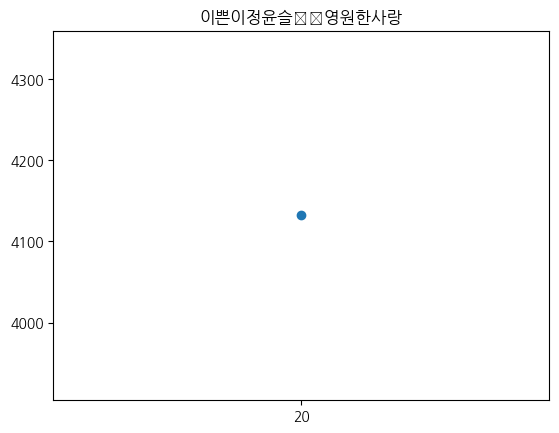

재벌박회장


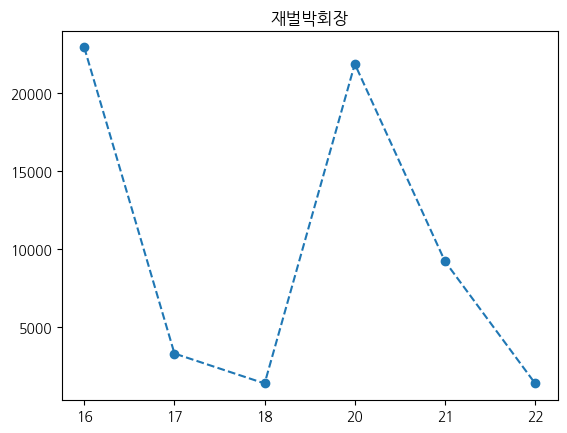

정윤슬➳❥Kix◡x


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10163 (\N{WHITE-FEATHERED RIGHTWARDS ARROW}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9697 (\N{LOWER HALF CIRCLE}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


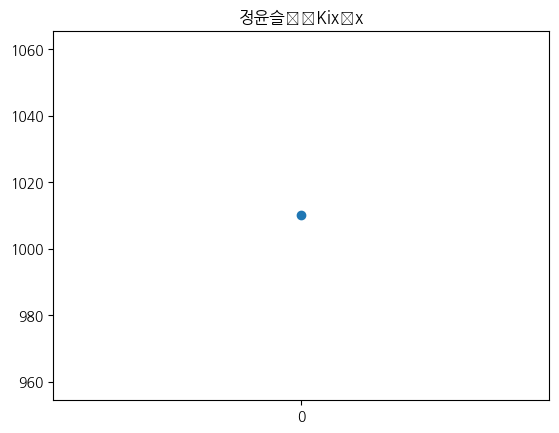

정윤슬➳❥독사단꼰데™


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10163 (\N{WHITE-FEATHERED RIGHTWARDS ARROW}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


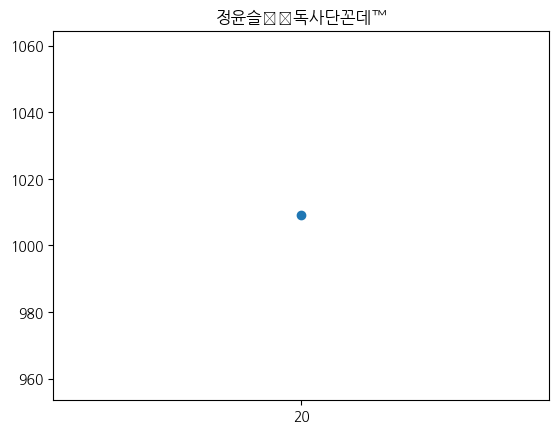

젖린린


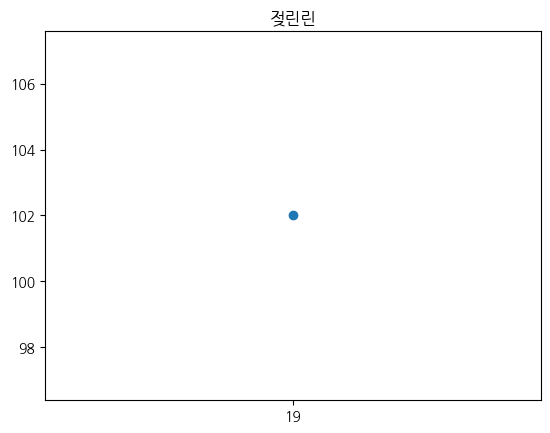

지나가버린사람


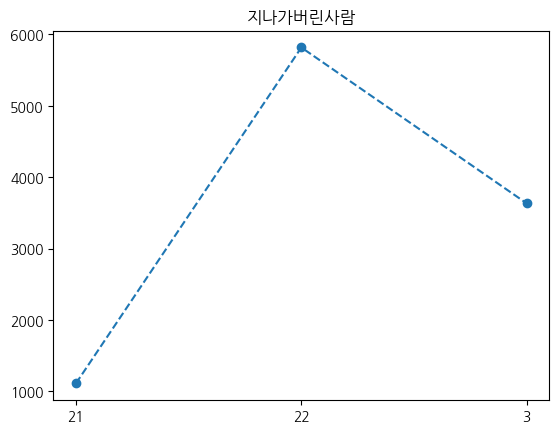

지원❥니야


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


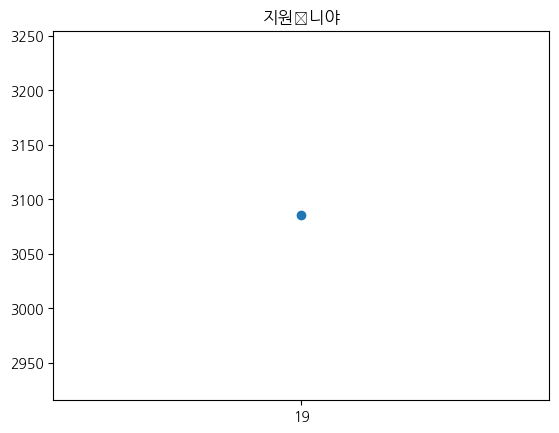

지원❥도끼맛바카스™


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


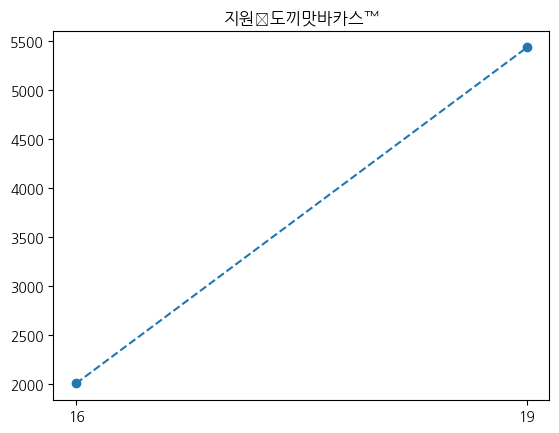

짭채냥


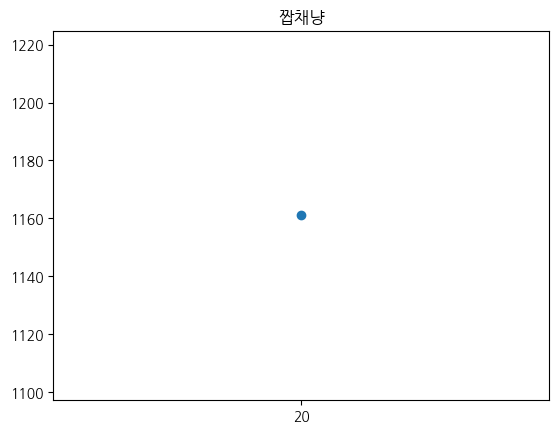

쫄보b


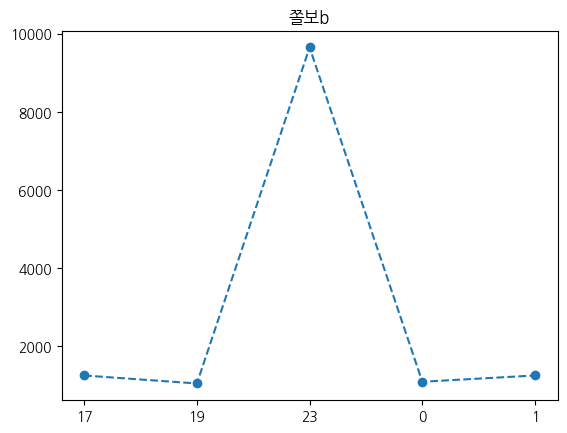

찐가시고기


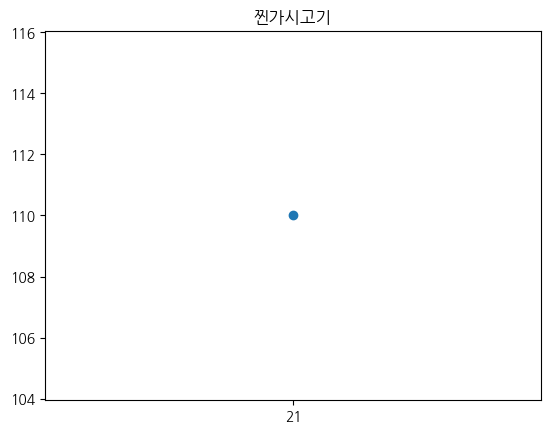

태이하세요❥태이네잼쪽이


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


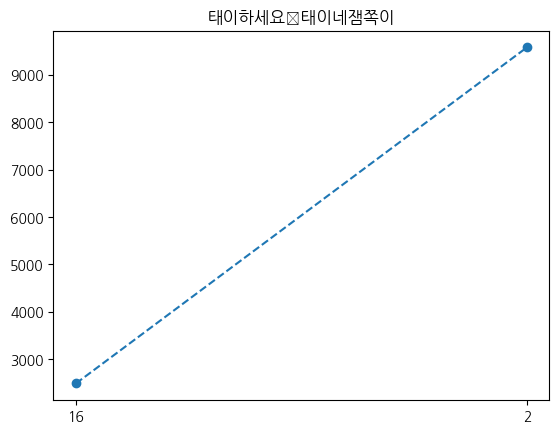

태자_갓_지림


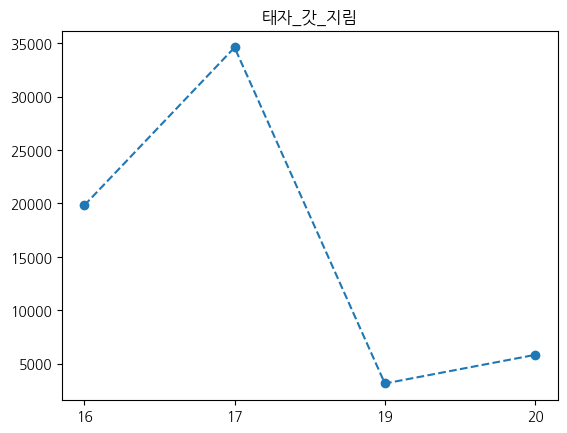

테라카쓰


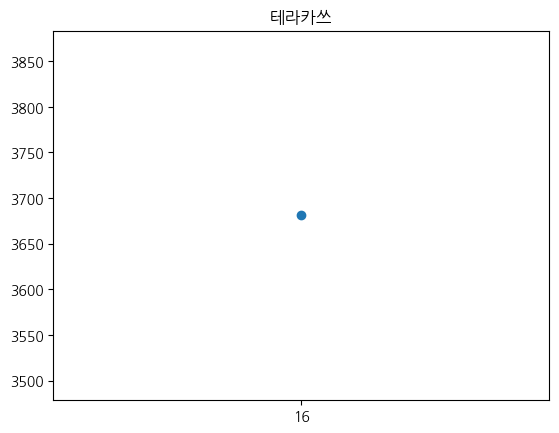

한가을ღ유깡


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


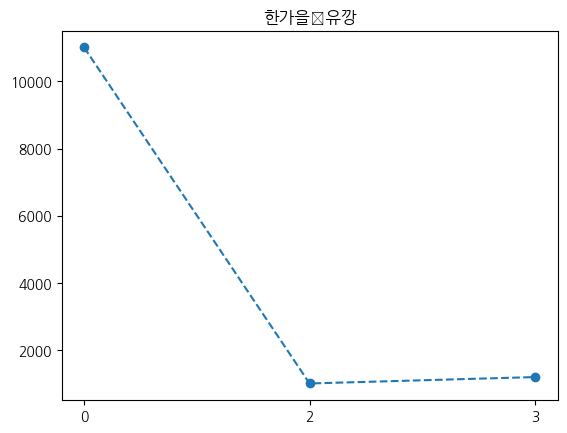

허리케인hj29


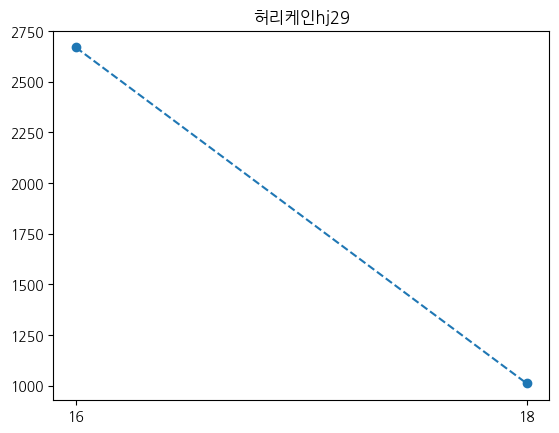

홍서하❥황릭문


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


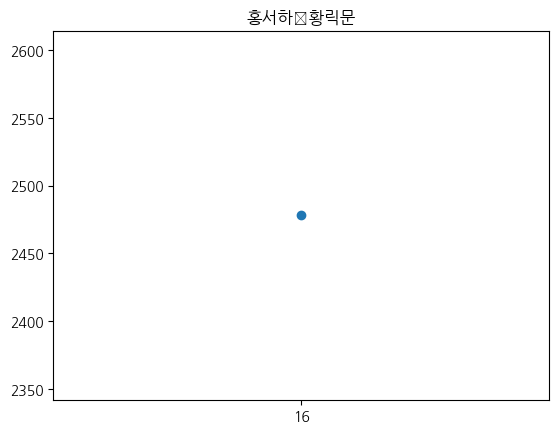

희영ෆ썸머ෆ


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3526 (\N{SINHALA LETTER FAYANNA}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Matplotlib currently does not support Sinhala natively.
  fig.canvas.print_figure(bytes_io, **kw)


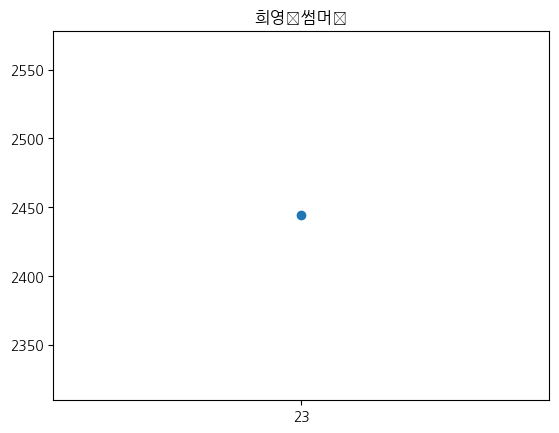

In [14]:
for i in VIP_list:
    VIP_time_df = re_df[re_df['후원 아이디(닉네임)']==i].groupby(['day','hour'])['후원하트'].sum().reset_index()
    print(i)
    plt.plot(VIP_time_df['hour'],VIP_time_df['후원하트'],linestyle='--',marker='o')
    plt.title(i)
    plt.show()

In [15]:
re_df2 = re_df.set_index('후원시간')

In [16]:
df_10m = pd.DataFrame()

df_10m['min'] = re_df2.후원하트.resample('10T').min()
df_10m['max'] = re_df2.후원하트.resample('10T').max()
df_10m['mean'] = re_df2.후원하트.resample('10T').mean()
df_10m['median'] = re_df2.후원하트.resample('10T').median()
df_10m['sum'] = re_df2.후원하트.resample('10T').sum()

/tmp/ipykernel_71337/916355910.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_10m['min'] = re_df2.후원하트.resample('10T').min()
/tmp/ipykernel_71337/916355910.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_10m['max'] = re_df2.후원하트.resample('10T').max()
/tmp/ipykernel_71337/916355910.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_10m['mean'] = re_df2.후원하트.resample('10T').mean()
/tmp/ipykernel_71337/916355910.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_10m['median'] = re_df2.후원하트.resample('10T').median()
/tmp/ipykernel_71337/916355910.py:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_10m['sum'] = re_df2.후원하트.resample('10T').sum()


In [17]:
df_10m

,min,max,mean,median,sum
후원시간,,,,,
2024-09-26 15:20:00,100.0,5555.0,1938.250000,1049.0,7753
2024-09-26 15:30:00,999.0,999.0,999.000000,999.0,999
2024-09-26 15:40:00,100.0,1088.0,330.076923,100.0,4291
2024-09-26 15:50:00,100.0,1111.0,807.750000,1010.0,3231
2024-09-26 16:00:00,100.0,10012.0,3860.333333,1469.0,11581
...,...,...,...,...,...
2024-09-27 02:40:00,1009.0,10013.0,4462.800000,4788.5,44628
2024-09-27 02:50:00,1010.0,10013.0,2836.375000,1180.5,22691
2024-09-27 03:00:00,10004.0,10004.0,10004.000000,10004.0,30012


## 6. 10분 집계당 시계열 통계 그래프

min


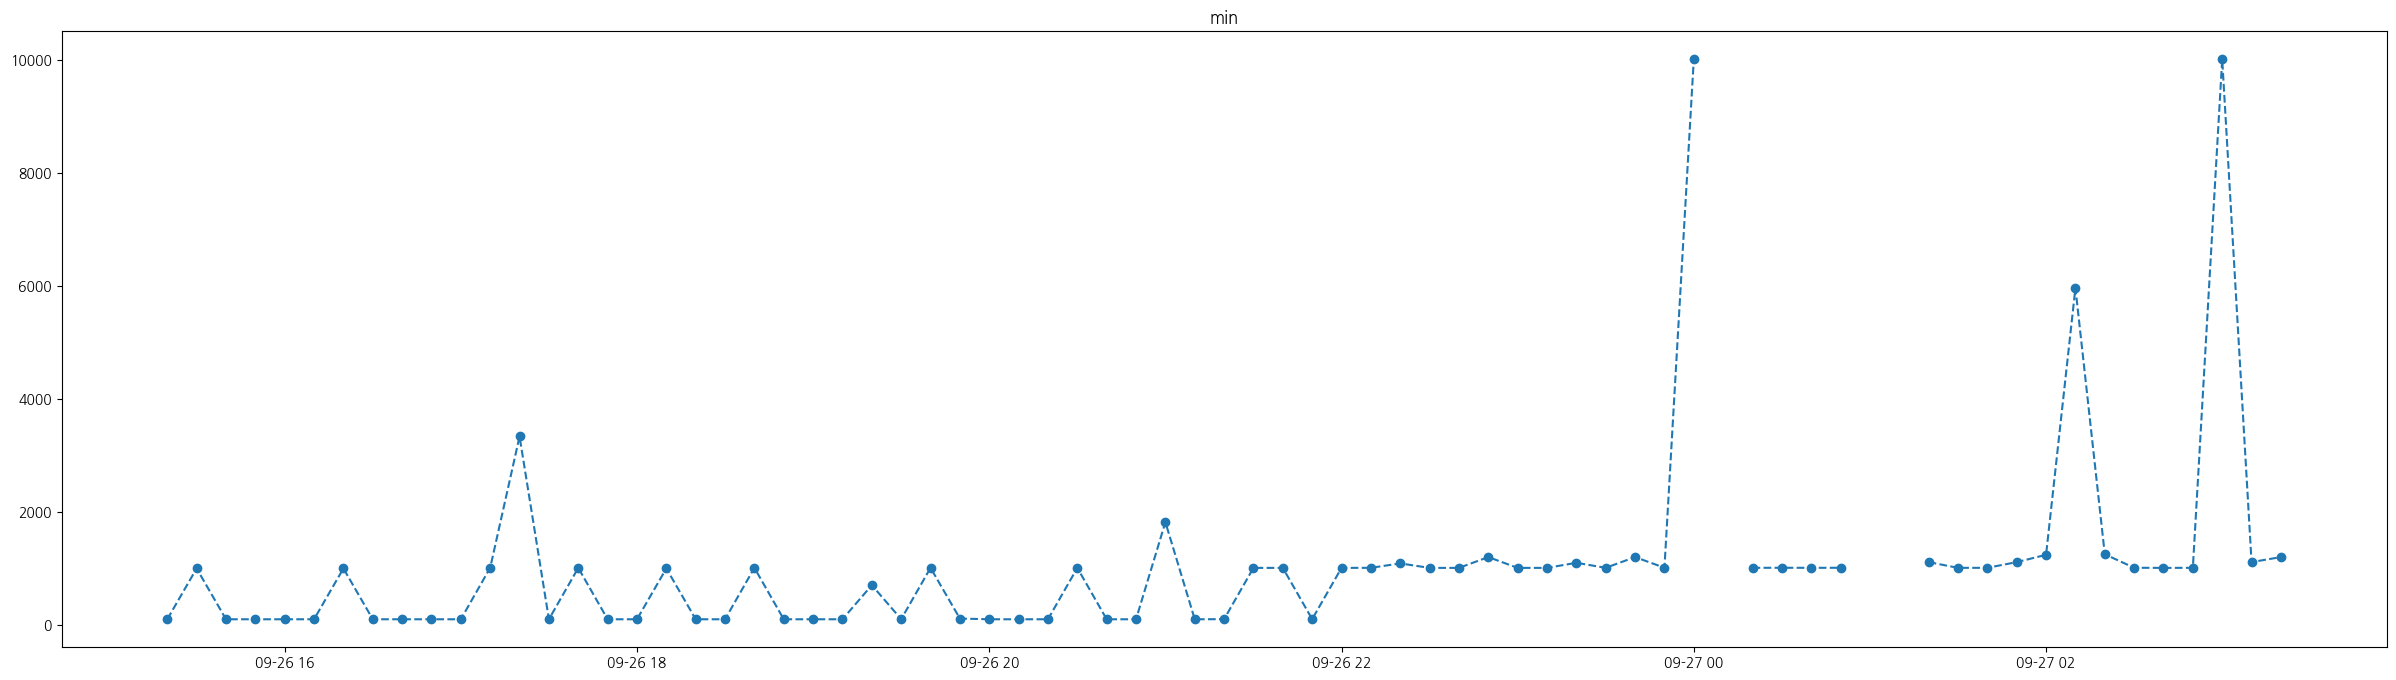

max


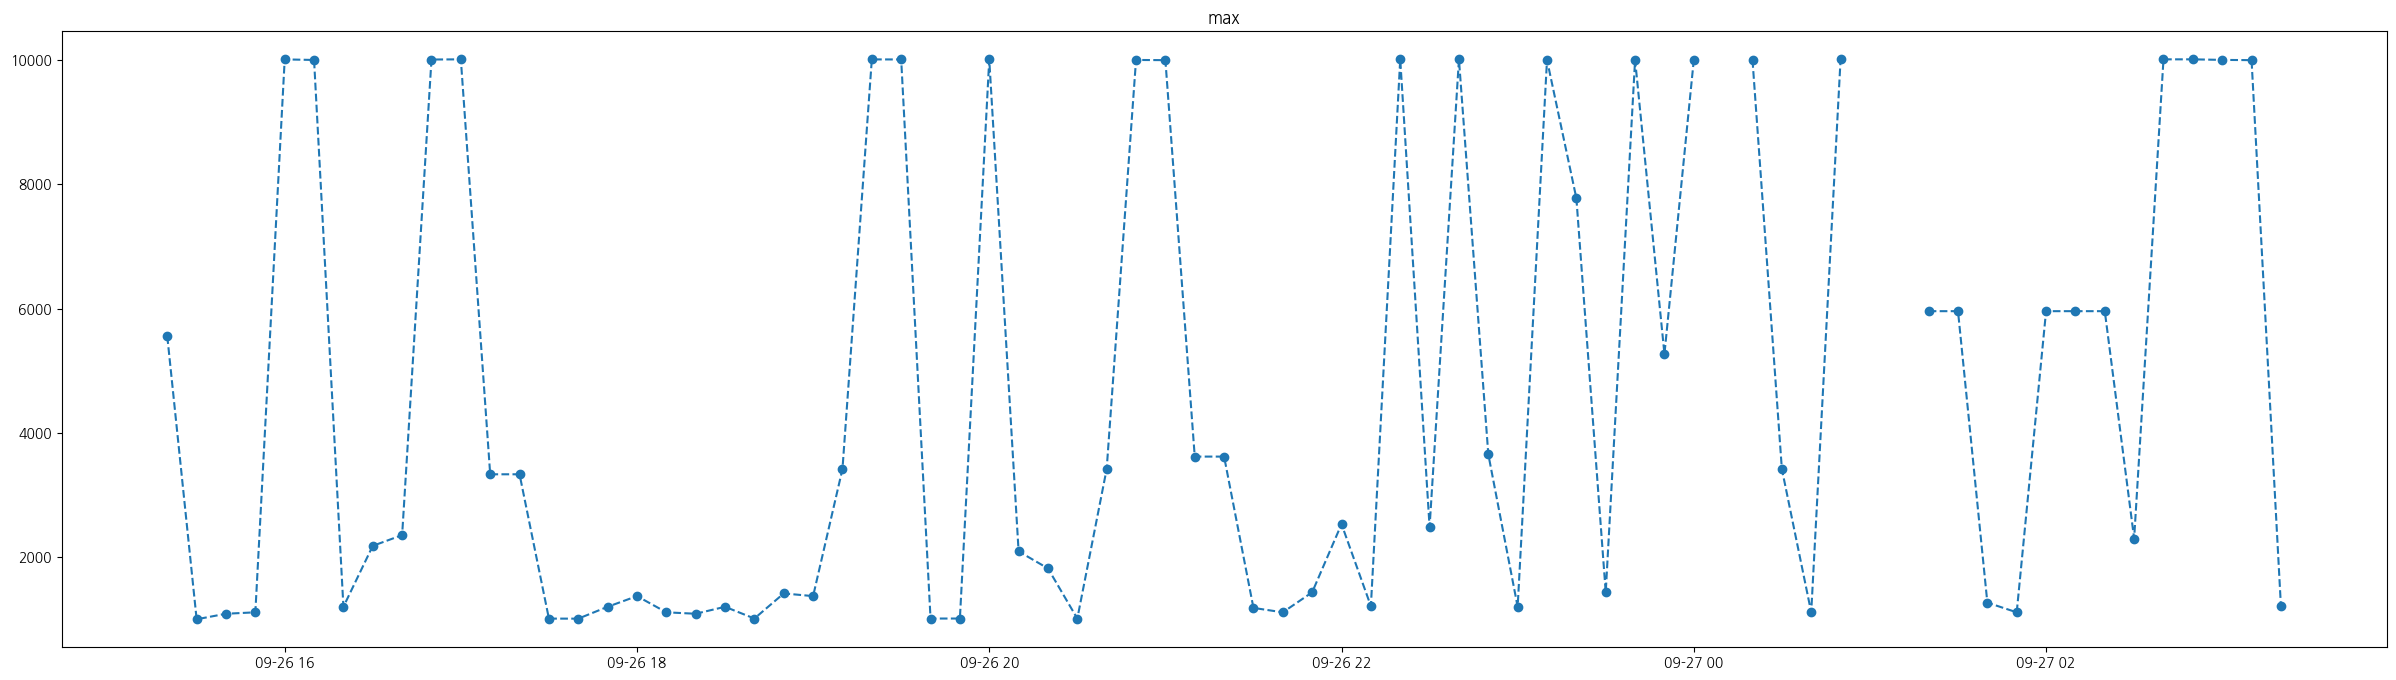

mean


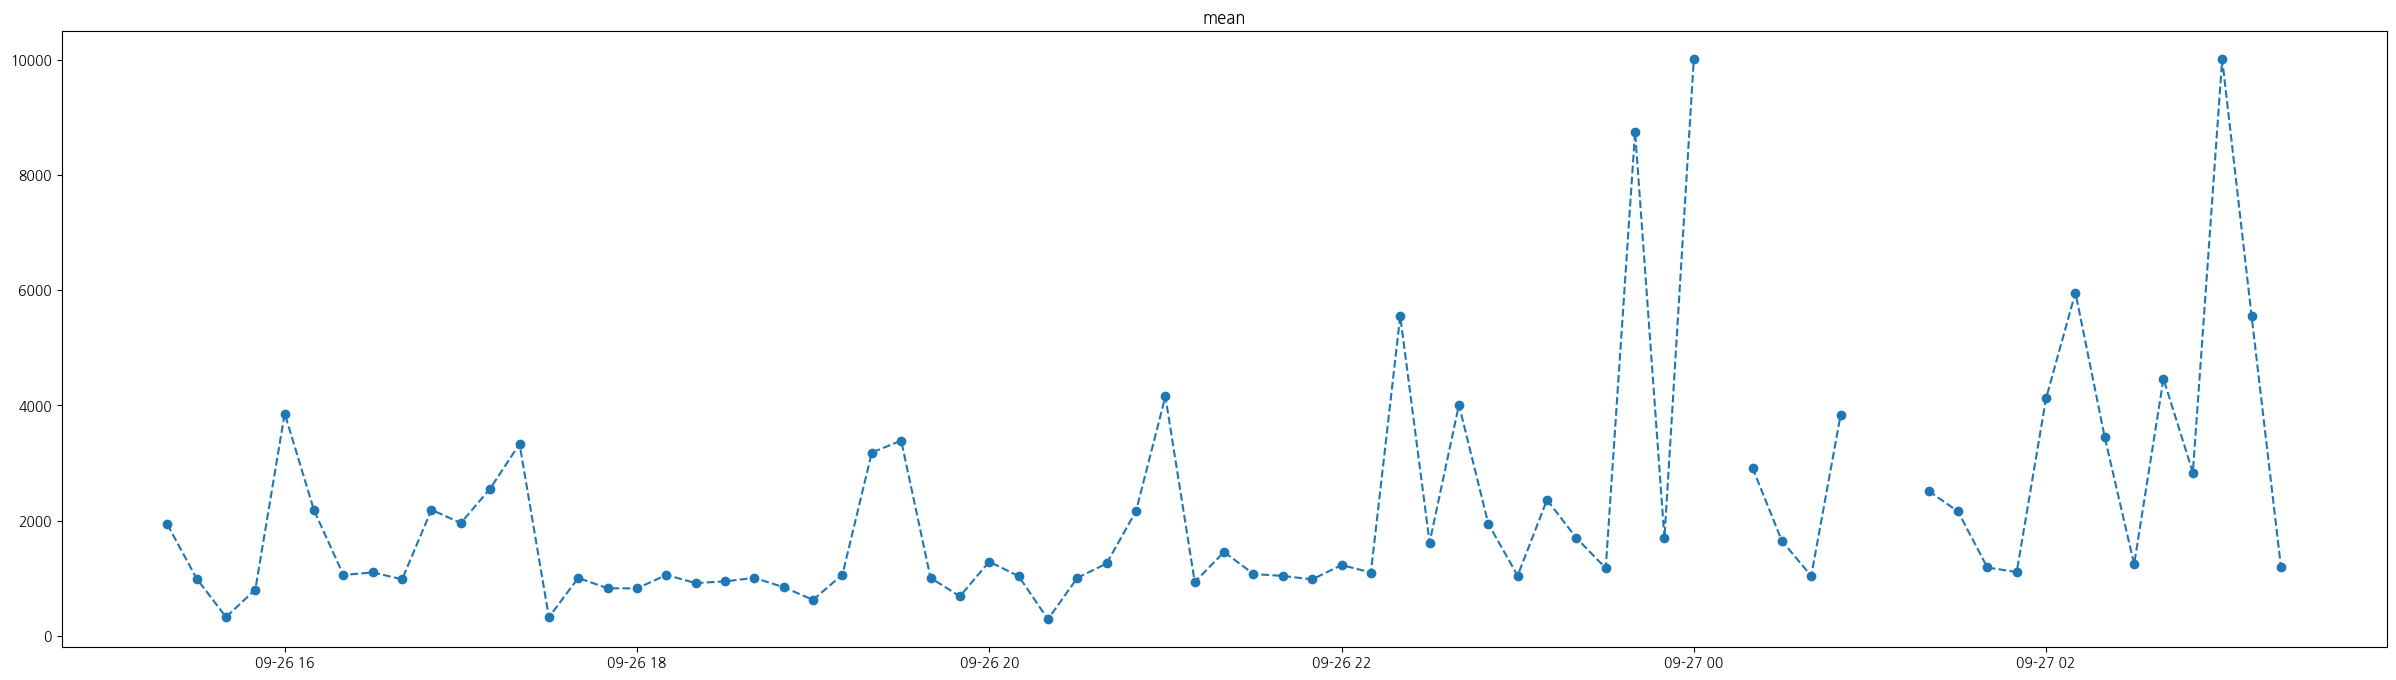

median


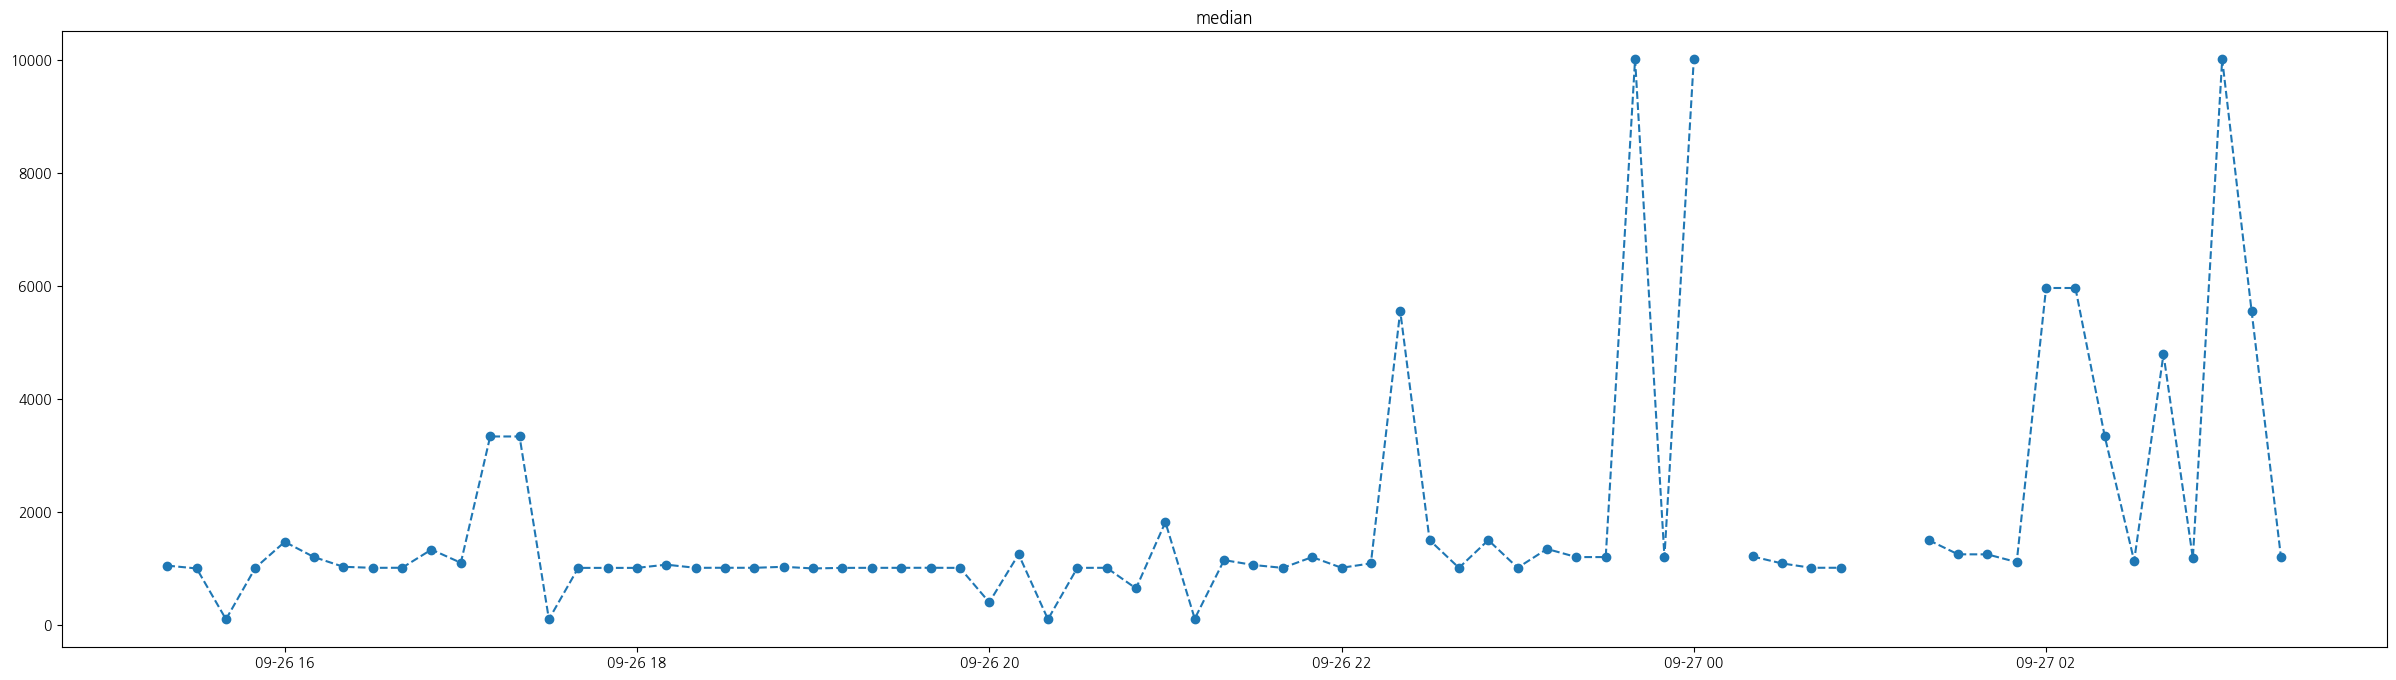

sum


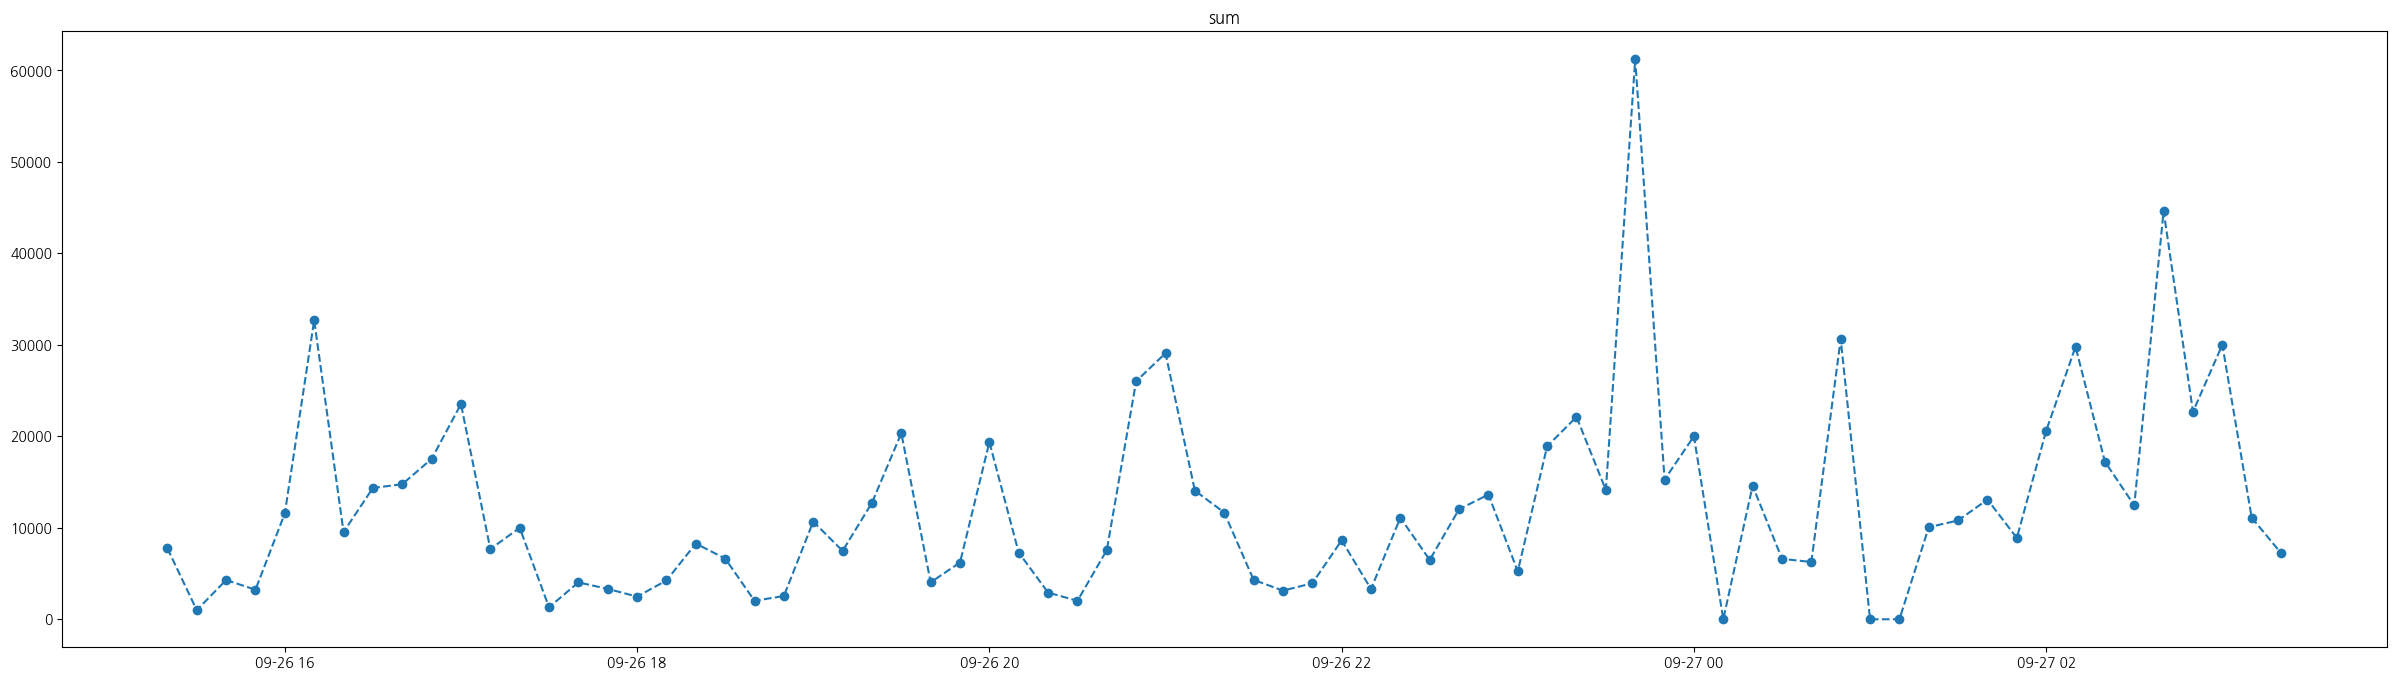

In [18]:
for i in list(df_10m.columns):
    print(i)
    plt.figure(figsize=(30,8))
    plt.plot(df_10m[i],linestyle='--',marker='o')
    plt.title(i)
    plt.show()